### Check for the execustion time for this notebook in bottom of the page
#### 300.5179488658905 seconds approx

In [1]:
import time  # import time 
# start time 
start_time = time.time()

## 1. Your views about the problem statement?

The problem statement involves predicting the salary of newly hired employees at TechWorks Consulting using provided data, including factors such as college tier, city type, role, previous CTC, previous job change, graduation marks, experience, and CTC as target columns.

TechWorks Consulting wants to use machine learning techniques to train a data-driven decision model for salary to ensure fairness and competitiveness in salary for new employees.

The target problem is a continuous variable, which means it's a regression problem where we need to predict salary. 

## 2. What will be your approach to solving this task?
**2.1. Data Understanding and Tidying:-** First, to understand the three given datasets (cities, colleges, ML study case). According to the provided criteria for the college and city columns, I will replace them with Tier-1, Tier-2, and Tier-3 for the college column, and also replace the city columns data as metro cities and non-metro cities.

**2.2. Data Cleaning and Preprocessing:-** Perform the EDD (Extended Data Dictionary) process to check for missing values and Explore relationships between features and the target variable, by using scatter-plot, box-plot, distribution plots, and count-plots to identify patterns. By using scatter-plot and box-plot, we can check for the outliers.

**2.3. Exploratory Data Analysis (EDA):-** EDD treatment for missing values and outliers, if required and to encode categorical variables to normalize numerical features and also to create dummies values for categorical variables and splitting into dependent and independent variables, and train-test split. 

**2.4. Model Selection:-** As the problem involves predicting a continuous target variable, selecting regression models such as Linear Regression, Ridge Regression, and Lasso Regression is suitable.

**&rightarrow; Random Forest Regressor, Gradient Boosting, AdaBoost, and XGBoost can handle both categorical and continuous target variables. Therefore, I will also use these above mentioned models also to train and predict the salary for a new employee.**

**2.5. Model Evaluation:-** After training with the selected model, check for performance evaluation metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared, and also check for overfitting, and will select the best-performing model among them.

**2.6. Prediction and conclusion:-** Based on the above step will find the best-fit model for the problem statement and also conclude with the accuracy of model fitting.

### 2.1. Data Understanding and Tidying
##### 2.1.1 Importing Numpy, Pandas, Seaborn, and matplot libraries for data intrepretation and visualization

In [2]:
import numpy as np     # Importing Numpy library 
import pandas as pd    # Importing Pandas library 
import seaborn as sns  # Importing Seaborn library 
import matplotlib.pyplot as plt  # Importing Matplot library 

##### 2.1.2 Loading and printing cities, Colleges, and ML case study datas using pandas library
**&rightarrow; Note:-Change the path location for all the three files**


In [3]:
# Loading and printing cities dataset csv file
cities = pd.read_csv('E:/PHD ADMISSION/Om Namah Shivay/Data Science/ML with Python/Module-6 Final project/cities.csv', header=0)
print(("\033[1m cities dataset \033[0m"), "\n", cities, "\n")

# Loading and printing Colleges dataset csv file
Colleges = pd.read_csv('E:/PHD ADMISSION/Om Namah Shivay/Data Science/ML with Python/Module-6 Final project/Colleges.csv', header=0)
print(("\033[1m Colleges dataset \033[0m"), "\n", Colleges, "\n")

# Loading and printing ML_case_Study dataset csv file
ML_case_Study = pd.read_csv('E:/PHD ADMISSION/Om Namah Shivay/Data Science/ML with Python/Module-6 Final project/ML case Study.csv', header=0)
print(("\033[1m ML_case_Study \033[0m"), "\n", ML_case_Study, "\n")

 cities dataset  
   Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode
5   Hyderabad  Rajpur Sonarpur
6   Ahmedabad         Kolhapur
7        Pune            Ajmer
8       Surat              NaN 

 Colleges dataset  
                             Tier 1                                     Tier 2  \
0                       IIT Bombay                             IIIT Bangalore   
1                        IIT Delhi                                 IIIT Delhi   
2                    IIT Kharagpur                                     IGDTUW   
3                       IIT Madras                                NIT Calicut   
4                       IIT Kanpur                              IIITM Gwalior   
5                      IIT Roorkee                               IIIT Lucknow   
6                     IIT Guwahati                            MNNIT Allahabad   


##### 2.1.3 Replace colleges name of "College" column in "ML_case_Study" dataset with "Tier-1", "Tier-2", and "Tier-3"

In [4]:
# Iterate over each college column's rows in ML_case_Study
for index, row in ML_case_Study.iterrows():
    college = row['College']
    
    # Check if colleges exists in any tier of Colleges DataFrame
    for tier in ["Tier 1", "Tier 2", "Tier 3"]:
        if college in Colleges[tier].values:
            
            # Replace college with its corresponding tiers
            ML_case_Study.at[index, 'College'] = tier
            break
            
# Printing ML_case_Study dataset csv file with Tiers-data for college column            
print(ML_case_Study)

     College             City       Role  Previous CTC  Previous job change  \
0     Tier 2          Asansol    Manager         55523                    3   
1     Tier 2            Ajmer  Executive         57081                    1   
2     Tier 3  Rajpur Sonarpur  Executive         60347                    2   
3     Tier 3            Ajmer  Executive         49010                    2   
4     Tier 1         Durgapur  Executive         57879                    4   
...      ...              ...        ...           ...                  ...   
1584  Tier 1            Surat  Executive         61285                    3   
1585  Tier 1  Rajpur Sonarpur  Executive         63140                    1   
1586  Tier 1        Ahmedabad  Executive         44907                    1   
1587  Tier 1         Durgapur  Executive         52054                    2   
1588  Tier 2            Delhi    Manager         44353                    3   

      Graduation Marks  EXP (Month)       CTC  
0  

##### 2.1.4 Replace cities name of "City" column in "ML_case_Study" dataset with "Metrio City" and "non-metro cities"

In [5]:
# Iterate over each city column's rows in ML_case_Study
for index, row in ML_case_Study.iterrows():
    city = row['City']
    
    # Check if city exists in any type of Cities DataFrame
    for cities_type in ["Metrio City", "non-metro cities"]:
        if city in cities[cities_type].values:
            
            # Replace city with its corresponding type
            ML_case_Study.at[index, 'City'] = cities_type
            break
            
# Printing ML_case_Study dataset csv file with types of cities dataframe              
print(ML_case_Study)

     College              City       Role  Previous CTC  Previous job change  \
0     Tier 2  non-metro cities    Manager         55523                    3   
1     Tier 2  non-metro cities  Executive         57081                    1   
2     Tier 3  non-metro cities  Executive         60347                    2   
3     Tier 3  non-metro cities  Executive         49010                    2   
4     Tier 1  non-metro cities  Executive         57879                    4   
...      ...               ...        ...           ...                  ...   
1584  Tier 1       Metrio City  Executive         61285                    3   
1585  Tier 1  non-metro cities  Executive         63140                    1   
1586  Tier 1       Metrio City  Executive         44907                    1   
1587  Tier 1  non-metro cities  Executive         52054                    2   
1588  Tier 2       Metrio City    Manager         44353                    3   

      Graduation Marks  EXP (Month)    

##### 2.1.5 Assign "0" for "non-metro cities" and "1" for "Metrio City" of "City" column in "ML_case_Study" dataset

In [6]:
# Define a dictionary to map city types to numerical values
city_mapping = {"non-metro cities": 0, "Metrio City": 1}

# Convert 'City' column to categorical
ML_case_Study['City'] = ML_case_Study['City'].astype('category')

# Map categorical values to numerical values
ML_case_Study['City'] = ML_case_Study['City'].map(city_mapping)

# Printing ML_case_Study dataset csv file with categorical cities dataframe  
print(ML_case_Study)

     College City       Role  Previous CTC  Previous job change  \
0     Tier 2    0    Manager         55523                    3   
1     Tier 2    0  Executive         57081                    1   
2     Tier 3    0  Executive         60347                    2   
3     Tier 3    0  Executive         49010                    2   
4     Tier 1    0  Executive         57879                    4   
...      ...  ...        ...           ...                  ...   
1584  Tier 1    1  Executive         61285                    3   
1585  Tier 1    0  Executive         63140                    1   
1586  Tier 1    1  Executive         44907                    1   
1587  Tier 1    0  Executive         52054                    2   
1588  Tier 2    1    Manager         44353                    3   

      Graduation Marks  EXP (Month)       CTC  
0                   66           19  71406.58  
1                   84           18  68005.87  
2                   52           28  76764.02  
3  

### 2.2. Data Cleaning and Preprocessing
##### 2.2.1 EDD (Extended Data Dictionary) process to check for missing values

In [7]:
# To get the information about the "ML_case_Study" dataframe, including data types, non-null counts, and memory usage
ML_case_Study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   College              1589 non-null   object  
 1   City                 1589 non-null   category
 2   Role                 1589 non-null   object  
 3   Previous CTC         1589 non-null   int64   
 4   Previous job change  1589 non-null   int64   
 5   Graduation Marks     1589 non-null   int64   
 6   EXP (Month)          1589 non-null   int64   
 7   CTC                  1589 non-null   float64 
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 88.7+ KB


In [8]:
# To get the descriptive statistics of the "ML_case_Study" numeric columns
ML_case_Study.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


##### 2.2.2 Scatter-plot fro visualize the relationship between variables and to check for the outliers

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


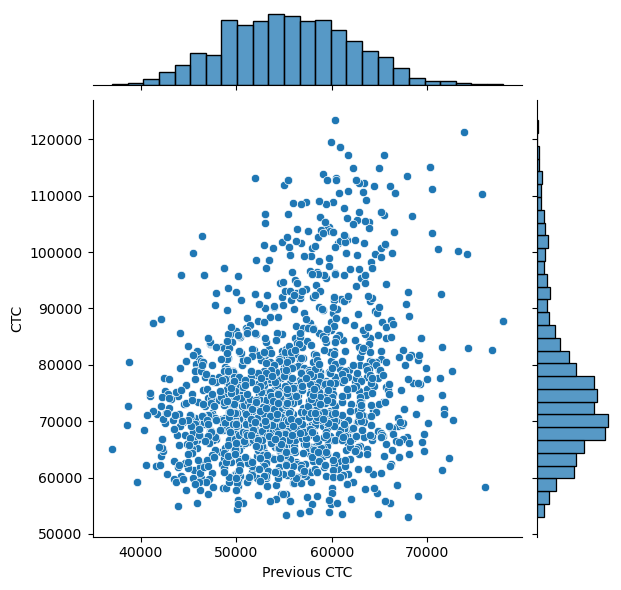

In [9]:
# Check for the outliers with help of scatter plot that shows the relationship between 
# "Previous CTC" and "CTC" with univariate distribution of each varaiable
sns.jointplot(x='Previous CTC', y='CTC', data = ML_case_Study)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


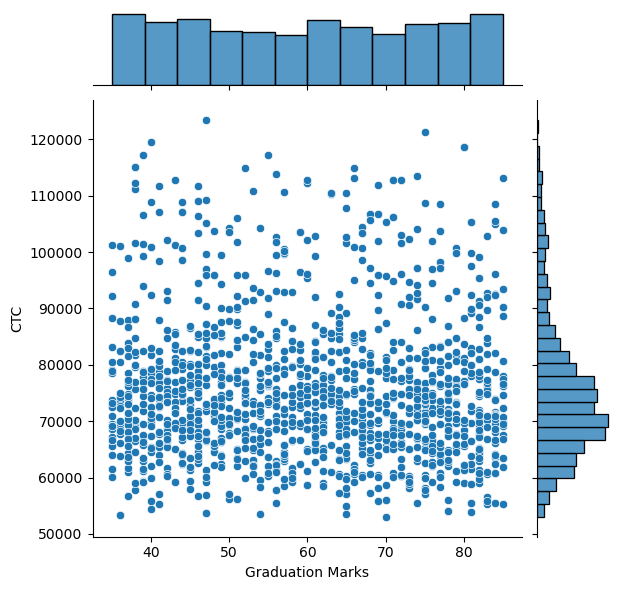

In [10]:
# Check for the outliers with help of scatter plot that shows the relationship between 
# "Graduation Marks" and "CTC" with univariate distribution of each varaiable
sns.jointplot(x='Graduation Marks', y='CTC', data = ML_case_Study)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


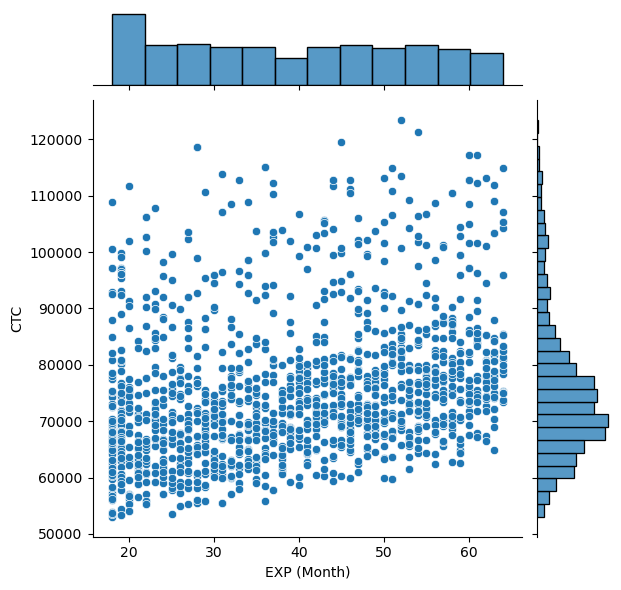

In [11]:
# Check for the outliers with help of scatter plot that shows the relationship between 
# "EXP (Month)" and "CTC" with univariate distribution of each varaiable
sns.jointplot(x='EXP (Month)', y='CTC', data = ML_case_Study)

##### 2.2.3  By using box-plot we can able to check for outliers for continous variables

<Axes: ylabel='Graduation Marks'>

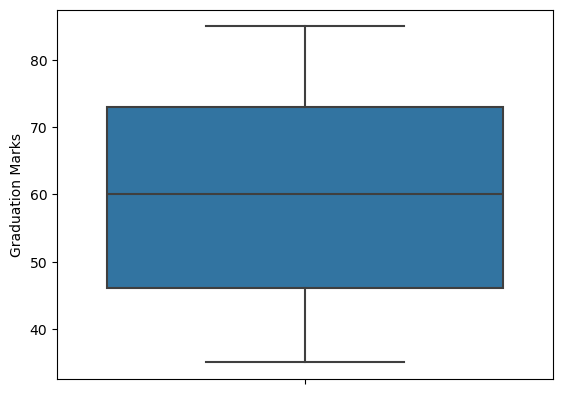

In [12]:
# To visualize the distribution of 'Graduation Marks' in the "ML_case_Study" dataset and also to check for the outliers
sns.boxplot(y='Graduation Marks', data=ML_case_Study)

<Axes: ylabel='Previous CTC'>

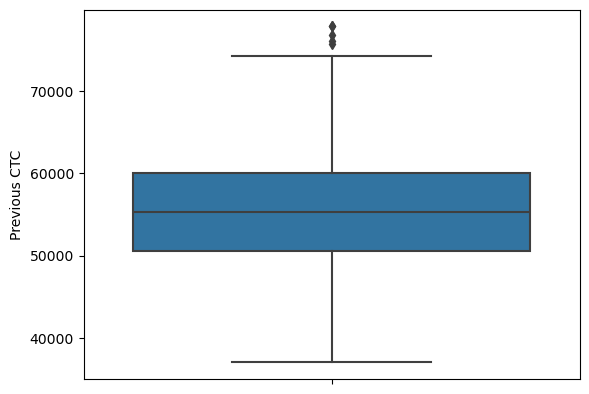

In [13]:
# To visualize the distribution of 'Previous CTC' in the "ML_case_Study" dataset and also to check for the outliers
sns.boxplot(y='Previous CTC', data=ML_case_Study)

<Axes: ylabel='EXP (Month)'>

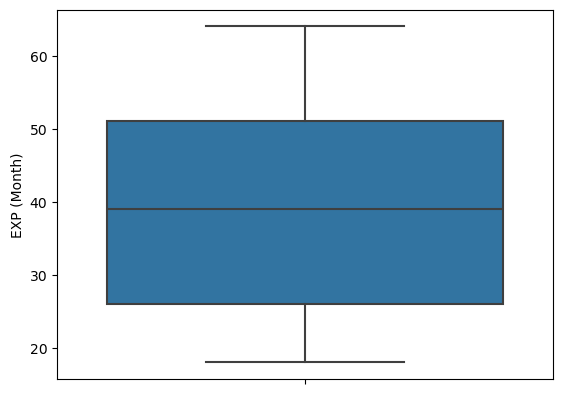

In [14]:
# To visualize the distribution of 'EXP (Month)' in the "ML_case_Study" dataset and also to check for the outliers
sns.boxplot(y='EXP (Month)', data=ML_case_Study)

<Axes: ylabel='CTC'>

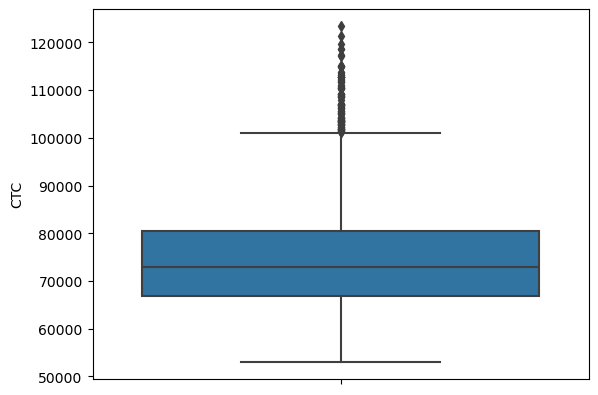

In [15]:
# To visualize the distribution of 'CTC' in the "ML_case_Study" dataset and also to check for the outliers
sns.boxplot(y='CTC', data=ML_case_Study)

##### 2.2.4 Count-plot to analyse the total counts of categorical varaibles in  "ML_case_Study" dataframe

<Axes: xlabel='College', ylabel='count'>

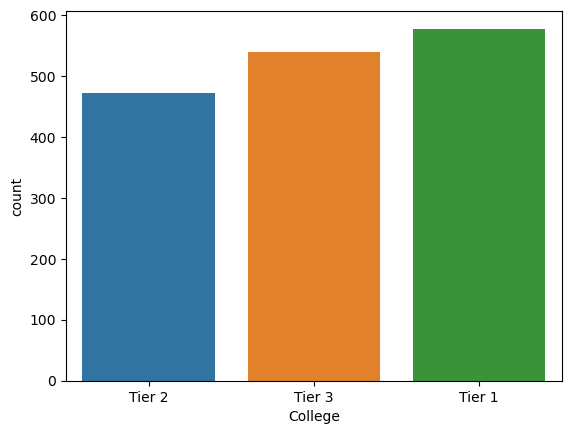

In [16]:
# To check the counts of observations in each categorical (Tier-1, Tier-2, Tier-3) bins using bar graph
sns.countplot(x='College', data = ML_case_Study)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='City', ylabel='count'>

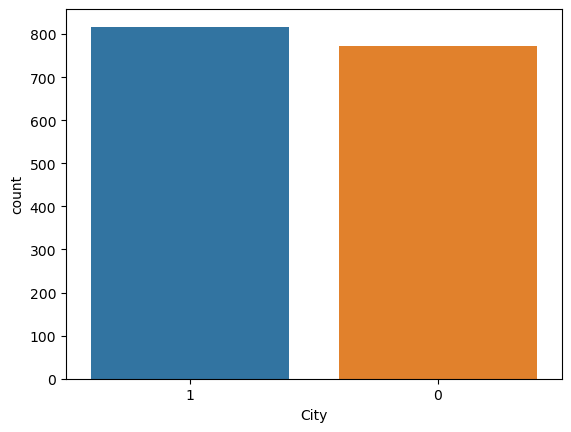

In [17]:
# To check the counts of observations in each categorical (0-non-metro cities, 1-Metrio City) bins using bar graph
sns.countplot(x='City', data = ML_case_Study)

<Axes: xlabel='Role', ylabel='count'>

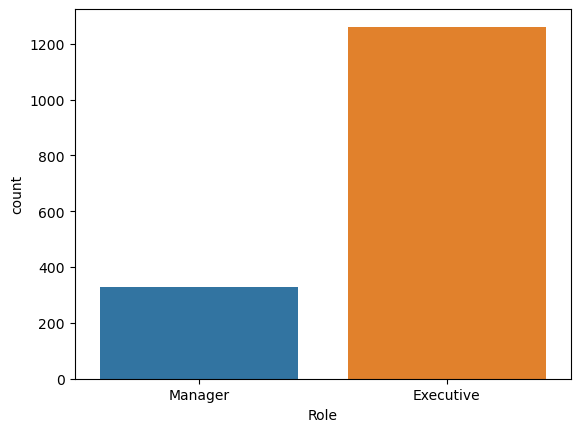

In [18]:
# To check the counts of observations in each categorical ("Manager", "Executive") bins using bar graph
sns.countplot(x='Role', data = ML_case_Study)

<Axes: xlabel='Previous job change', ylabel='count'>

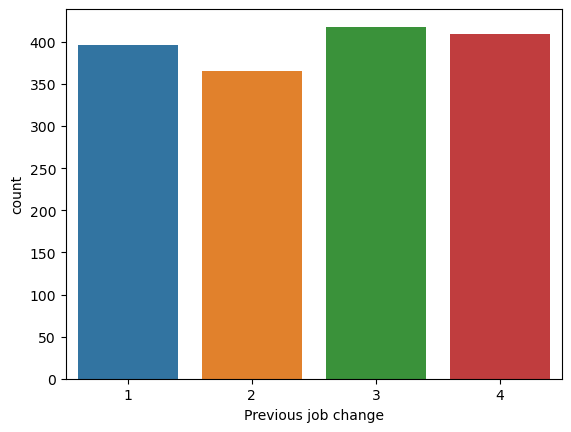

In [19]:
# To check the counts of observations in each categorical (Numbers of job change) bins using bar graph
sns.countplot(x='Previous job change', data = ML_case_Study)

##### 2.2.5  Checking for skewnwss for "CTC" and "Previous CTC" dataset varaibles in  "ML_case_Study" dataframe

Skewness: 1.090956902899517


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


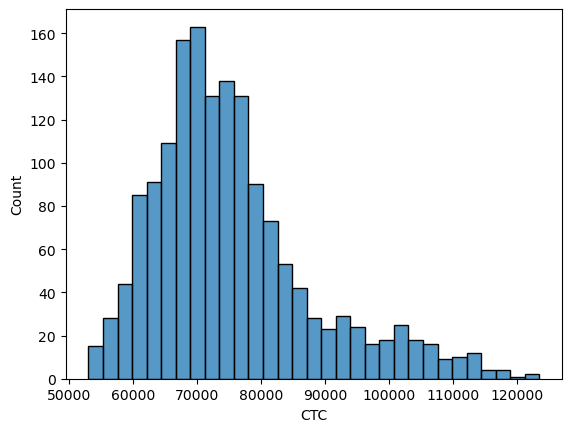

In [20]:
from scipy.stats import skew  # Import skewness model from scipy states model

# Create a histogram for "CTC"
sns.histplot(data=ML_case_Study['CTC'])

# Calculate and print skewness for "CTC"
skewness = skew(ML_case_Study['CTC'])
print("Skewness:", skewness)

Skewness: 0.15027609516719886


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


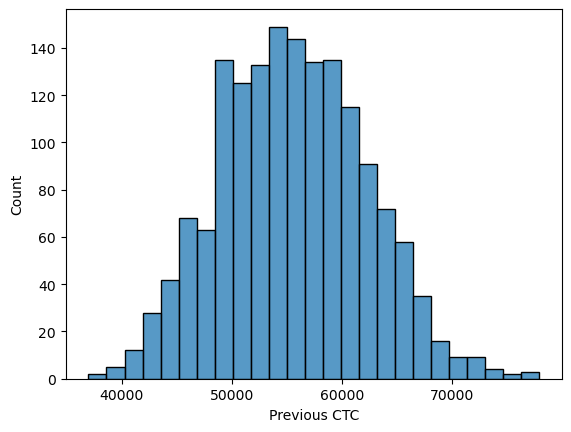

In [21]:
# Create a histogram for "P"revious CTC"
sns.histplot(data=ML_case_Study['Previous CTC'])

# Calculate and print skewness for "Previous CTC"
skewness = skew(ML_case_Study['Previous CTC'])
print("Skewness:", skewness)

### Observations after EDD on provided dataset
&rightarrow; No missing values in any of the columns of ML_case_Study dataset, so no missing value treatment is required

&rightarrow; By visualizing with a scatter plot, there are no outliers in "Previous CTC", "Graduation marks", and "EXP (Month)" 

##### For the outliers in varaiable, box-plots gives proper visualizatuions
&rightarrow; There are outliers showing in "Previous CTC" and "CTC"

**Note1-In a practical case, the "Previous CTC", "CTC" of any employee might fall outside the expected range, which could be flagged as an outlier. However, I believe that treating it solely as an outlier might not accurately reflect the significance of the data**

##### For the count of categorical datas, count-plots gives proper visualizatuions
&rightarrow; There are more counts of colleges for Tier-1 then  Tier-2, and less count of colleges in Tier-3

&rightarrow; Count for "Manager" role are approximate 1/4th of the count of "Executive"

##### Checking for skewnwss for "CTC" and "Previous CTC" dataset
&rightarrow; Positive skewness of "1.090956902899517" in CTC

&rightarrow; Almost symetric distribution with skewness of 0.15027609516719886 in Previous CTC

**Note2-Checking for skewnwss for "CTC" and "Previous CTC" dataset shows that no transfromation/scaling is needed.**

### 2.3. Exploratory Data Analysis (EDA)
##### 2.3.1 Creating dummies values for categorical variables

In [22]:
# converts the categorical variables in the DataFrame "ML_case_Study" into dummy variables and convert it into float data type
ML_case_Study = pd.get_dummies(ML_case_Study).astype(float)

In [23]:
# To display the first few rows of  "ML_case_Study" dataframe to check for the created dummies variables
ML_case_Study.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier 1,College_Tier 2,College_Tier 3,City_1,City_0,Role_Executive,Role_Manager
0,55523.0,3.0,66.0,19.0,71406.58,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,57081.0,1.0,84.0,18.0,68005.87,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,60347.0,2.0,52.0,28.0,76764.02,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,49010.0,2.0,81.0,33.0,82092.39,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,57879.0,4.0,74.0,32.0,73878.10,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [24]:
# To get the information about the ML_case_Study dataframe, including data types, non-null counts, and memory usage after EDD
ML_case_Study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   float64
 2   Graduation Marks     1589 non-null   float64
 3   EXP (Month)          1589 non-null   float64
 4   CTC                  1589 non-null   float64
 5   College_Tier 1       1589 non-null   float64
 6   College_Tier 2       1589 non-null   float64
 7   College_Tier 3       1589 non-null   float64
 8   City_1               1589 non-null   float64
 9   City_0               1589 non-null   float64
 10  Role_Executive       1589 non-null   float64
 11  Role_Manager         1589 non-null   float64
dtypes: float64(12)
memory usage: 149.1 KB


In [25]:
# To get the descriptive statistics of the ML_case_Study numeric columns after EDD
ML_case_Study.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tier 1,College_Tier 2,College_Tier 3,City_1,City_0,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.363751,0.297042,0.339207,0.514160,0.485840,0.793581,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.481230,0.457099,0.473589,0.499957,0.499957,0.404862,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 2.3.2  Independent and dependent (CTC) data spliting

In [26]:
# Creating and printing "X" dataframe as independent data
X = ML_case_Study.loc[:,ML_case_Study.columns!="CTC"]
print(X) # print "X"

      Previous CTC  Previous job change  Graduation Marks  EXP (Month)  \
0          55523.0                  3.0              66.0         19.0   
1          57081.0                  1.0              84.0         18.0   
2          60347.0                  2.0              52.0         28.0   
3          49010.0                  2.0              81.0         33.0   
4          57879.0                  4.0              74.0         32.0   
...            ...                  ...               ...          ...   
1584       61285.0                  3.0              44.0         60.0   
1585       63140.0                  1.0              44.0         24.0   
1586       44907.0                  1.0              60.0         19.0   
1587       52054.0                  2.0              67.0         29.0   
1588       44353.0                  3.0              75.0         18.0   

      College_Tier 1  College_Tier 2  College_Tier 3  City_1  City_0  \
0                0.0             1.0   

In [27]:
# Creating and printing "Y" dataframe as dependent data
Y = ML_case_Study["CTC"]
print(Y) # print "Y"

0       71406.58
1       68005.87
2       76764.02
3       82092.39
4       73878.10
          ...   
1584    77283.59
1585    68416.86
1586    70186.19
1587    73394.09
1588    70056.31
Name: CTC, Length: 1589, dtype: float64


##### 2.3.3 Train-test data spliting from "X" and "Y" splitted dataframes

In [28]:
# Import the "train_test_split" library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with (80-20%) ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Print the shapes of the test, train of "X" and "Y" sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1271, 11) (318, 11) (1271,) (318,)


### 2.4 and 2.5 steps of second question-2, I will perfoem with question-3 together
## 3. What were the available ML model options you had to perform this task?
- 3.1 Linear Regression 

- 3.2 Ridge Regression

- 3.3 Ridge Regression for best fit

- 3.4 Lasso Regression

- 3.5 Lasso Regression for best fit

#### Random forest , Gradient search, Ada boost, and XG Boost can handle both numerical and categorical data

- 3.6 Random Forest

- 3.7 Gradient search for Random Forest

- 3.8 Gradient Boosting

- 3.9 Ada boost

- 3.10 XG Boost

- 3.11 Gradient search for XG Boost

- 3.12 Regression Decision Tree

### 3.1 Linear Regression
##### 3.1.1 Performing linear regression by using sklearn model on "y_train" and "x_train" varaibles

In [29]:
# Import the LinearRegression module from the sklearn.linear library
from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression() # Define linear regression function
# Fit Linear regression on "x_train" and "y_train"
Linear_Reg.fit(x_train, y_train)

LinearRegression()

In [30]:
# Predict the target variable for the train and test dataset using the trained linear regression model
LR_y_train_pred = Linear_Reg.predict(x_train)
LR_y_test_pred = Linear_Reg.predict(x_test)

# Print the predicted values for the train and test dataset
print(("\033[1m LR_y_train_pred \033[0m"), "\n", LR_y_train_pred, "\n")
print(("\033[1m LR_y_test_pred \033[0m"), "\n", LR_y_test_pred, "\n")

 LR_y_train_pred  
 [98453.08889013 74123.11122388 79270.36743551 ... 70662.74008792
 66318.96029305 64079.37485775] 

 LR_y_test_pred  
 [69072.97157722 64185.82508778 63670.08619491 71987.31728921
 76686.07438514 88787.73197719 69216.07031639 71351.99267037
 70940.6579401  73629.51709272 72259.24706729 78622.11246795
 85442.10715704 78135.78942901 77100.32160091 94049.04184729
 66350.1002527  69006.15736815 67239.43098471 81841.42555798
 91214.85199137 96649.64573073 71185.97326174 67442.28738845
 72576.87716459 68268.16348508 73631.0986326  94592.5237811
 72129.64571631 74404.21844102 68973.77357862 69926.99323596
 85499.57108251 80587.65985153 98786.83639389 80367.76829866
 71357.9609423  80776.43475046 74027.74077594 65762.27823758
 71480.89836234 87912.99591879 73025.40197368 67818.71043712
 74971.64693097 78230.13311958 86522.65773658 68135.87542501
 69449.73231303 76660.1117063  90209.01625535 69731.72495064
 91621.00609827 73120.67389892 89895.54007718 69458.23357251
 68399.05

##### 3.1.2 Performance evaluation for Linear regression

In [31]:
# Importung mean_absolute_error, mean_squared_error, r2_score function from sklearn.metrics model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##### 3.1.2.1 Calculation of MSE for train and test dataset

In [32]:
# Calculate mean squared error for training dataset of linear regression
LR_train_mse = mean_squared_error(y_train, LR_y_train_pred)

# Print "MSE" of train dataset for Linear regression
print(LR_train_mse)  

75026071.40800601


In [33]:
# Calculate mean squared error for testing dataset of linear regression
LR_test_mse = mean_squared_error(y_test, LR_y_test_pred)

# Print "MSE" of test dataset for Linear regression
print(LR_test_mse)  

68751323.92959405


##### 3.1.2.2 Calculation of MAE for train and test dataset

In [34]:
# Calculate mean absolute error for training dataset of linear regression
LR_train_mae = mean_absolute_error(y_train, LR_y_train_pred)

# Print "MAE" of train dataset for Linear regression
print(LR_train_mae) 

6864.301792426581


In [35]:
# Calculate mean absolute error for testing dataset of linear regression
LR_test_mae = mean_absolute_error(y_test, LR_y_test_pred)

# Print "MAE" of test dataset for Linear regression
print(LR_test_mae) 

6585.64174256123


##### 3.1.2.3 Calculation of R-square for train and test dataset

In [36]:
# R-squared score calculation for the train dataset's for actual values (y_train) and predicted values (LR_y_train_pred)
LR_train_R_score = r2_score(y_train, LR_y_train_pred)

## Print R-squared of train dataset for linear regression
print(LR_train_R_score)

0.5335038205027318


In [37]:
# R-squared score calculation for the test dataset's for actual values (y_test) and predicted values (LR_y_test_pred)
LR_test_R_score = r2_score(y_test, LR_y_test_pred)

## Print R-squared of test dataset for linear regression
print(LR_test_R_score)

0.5366674761765405


##### 3.1.2.4 Checking for overfitting and underfitting

In [38]:
# Check for overfitting
if LR_train_R_score > LR_test_R_score + 0.15:  # Example threshold for overfitting
    print("The 'Linear Regression' trained model is overfitting.")
elif LR_train_R_score < LR_test_R_score - 0.15:  # Example threshold for underfitting
    print("The 'Linear Regression' trained model is underfitting.")
else:
    print("The 'Linear Regression' trained model is Well-fitted.")

The 'Linear Regression' trained model is Well-fitted.


### 3.2 Ridge Regression (alpha=0.5)
##### 3.2.1 Performing ridge regression by using sklearn model on "y_train" and "x_train" varaibles 

In [39]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler().fit(x_train)

x_train_scaler = scaler.transform(x_train) # Transform the training data using the fitted scaler to standardize it
x_test_scaler = scaler.transform(x_test)   # Transform the test data using the same fitted scaler to standardize it

In [40]:
# Import the Ridge regression model from the sklearn.linear_model module
from sklearn.linear_model import Ridge

# Create a Ridge regression model object with regularization parameter alpha set to 0.5
Ridge_Reg = Ridge(alpha=0.5)

# Fit the Ridge regression model to the standardized (x_train_scaler) and (y_train) values
Ridge_Reg.fit(x_train_scaler, y_train)

Ridge(alpha=0.5)

In [41]:
# Predict the target variable for the train and test dataset using the trained ridge regression model
Ridge_y_train_pred = Ridge_Reg.predict(x_train_scaler)
Ridge_y_test_pred = Ridge_Reg.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m Ridge_y_train_pred \033[0m"), "\n", Ridge_y_train_pred, "\n")
print(("\033[1m Ridge_y_test_pred \033[0m"), "\n", Ridge_y_test_pred, "\n")

 Ridge_y_train_pred  
 [98447.30753981 74123.06355389 79268.34843199 ... 70663.65633326
 66321.58403639 64082.538673  ] 

 Ridge_y_test_pred  
 [69074.30123407 64189.15494698 63673.40775381 71987.8752577
 76685.09306655 88785.27103387 69217.60003673 71352.80838267
 70941.95421298 73629.47034091 72259.66778763 78620.16061432
 85440.99993136 78133.99337122 77099.26801563 94044.80459501
 66352.50733773 69007.77971953 67241.51343632 81838.50983741
 91211.5558935  96644.6303608  71186.96360773 67444.34272449
 72577.29422199 68269.88107042 73630.84735146 94588.13560446
 72130.05077322 74403.9866141  68975.32198283 69928.39765107
 85498.28332766 80585.24464293 98780.89345772 80365.36949668
 71358.71676478 80776.78936391 74027.58003458 65765.07176619
 71481.76486234 87910.72484518 73025.72575533 67820.73716435
 74971.00428028 78228.5966832  86520.99291424 68137.67931325
 69451.36108672 76659.03452781 90206.25766966 69732.84951875
 91617.64461337 73120.72658379 89893.01513532 69459.67937609
 68

##### 3.2.2 Performance evaluation for Ridge regression at alpha=0.5
##### 3.2.2.1 Calculation of MSE for train and test dataset at alpha=0.5

In [42]:
# Calculate mean squared error for training dataset of ridge regression
Ridge_train_mse = mean_squared_error(y_train, Ridge_y_train_pred)

# Print "MSE" of train dataset for ridge regression
print(Ridge_train_mse) 

75026076.75426425


In [43]:
# Calculate mean squared error for testing dataset of ridge regression
Ridge_test_mse = mean_squared_error(y_test, Ridge_y_test_pred)

# Print "MSE" of test dataset for ridge regression
print(Ridge_test_mse) 

68752063.19342352


##### 3.2.2.2 Calculation of MAE for train and test dataset at alpha=0.5

In [44]:
# Calculate mean absolute error for training dataset of ridge regression
Ridge_train_mae = mean_absolute_error(y_train, Ridge_y_train_pred)

# Print "MAE" of train dataset for ridge regression
print(Ridge_train_mae)

6864.382873492941


In [45]:
# Calculate mean absolute error for testing dataset of ridge regression
Ridge_test_mae = mean_absolute_error(y_test, Ridge_y_test_pred)

# Print "MAE" of test dataset for ridge regression
print(Ridge_test_mae)

6585.711869060048


##### 3.2.2.3 Calculation of R-square for train and test dataset at alpha=0.5

In [46]:
# R-squared score calculation for the train dataset's for actual values (y_train) and predicted values (Ridge_y_train_pred)
Ridge_train_R_score = r2_score(y_train, Ridge_y_train_pred)

## Print R-squared of train dataset for ridge regression
print(Ridge_train_R_score)

0.5335037872608333


In [47]:
# R-squared score calculation for the test dataset's for actual values (y_train) and predicted values (Ridge_y_test_pred)
Ridge_test_R_score = r2_score(y_test, Ridge_y_test_pred)

## Print R-squared of test dataset for ridge regression
print(Ridge_test_R_score)

0.5366624940910139


##### 3.2.2.4 Checking for overfitting and underfitting at alpha=0.5

In [48]:
# Check for overfitting
if Ridge_train_R_score > Ridge_test_R_score + 0.15:  # Example threshold for overfitting
    print("The 'Ridge Regression at alpha=0.5' trained model is overfitting.")
elif Ridge_train_R_score < Ridge_test_R_score - 0.15: # Example threshold for overfitting
    print("The 'Ridge Regression at alpha=0.5' trained model is underfitting.")
else:
    print("The 'Ridge Regression at alpha=0.5' trained model is Well-fitted.")

The 'Ridge Regression at alpha=0.5' trained model is Well-fitted.


### 3.3 Ridge Regression (alpha=best fit)
##### 3.3.1 Performing ridge regression by using sklearn model on "y_train" and "x_train" varaibles at best fit for alpha value

In [49]:
# Importing the validation_curve function from the sklearn.model_selection module
from sklearn.model_selection import validation_curve

# Generating a range of alpha values from 10^-2 to 10^8 with 100 points in between
param_range = np.logspace(-2, 8, 100)

# Calculating the training and testing scores for different alpha values using validation_curve
# Ridge() is used as the estimator, x_train_scaler and y_train are the training data, 
# param_name specifies the hyperparameter to vary (alpha in this case),
# param_range specifies the range of values to test for the specified hyperparameter,
# scoring specifies the evaluation metric (R-squared in this case)
ridge_train_scores, ridge_test_scores = validation_curve(Ridge(), x_train_scaler, y_train, 
                                              param_name="alpha", param_range=param_range, 
                                              scoring="r2")

# Calculating the mean of training and testing scores across all folds for each alpha value
ridge_train_mean = np.mean(ridge_train_scores, axis=1)
ridge_test_mean = np.mean(ridge_test_scores, axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


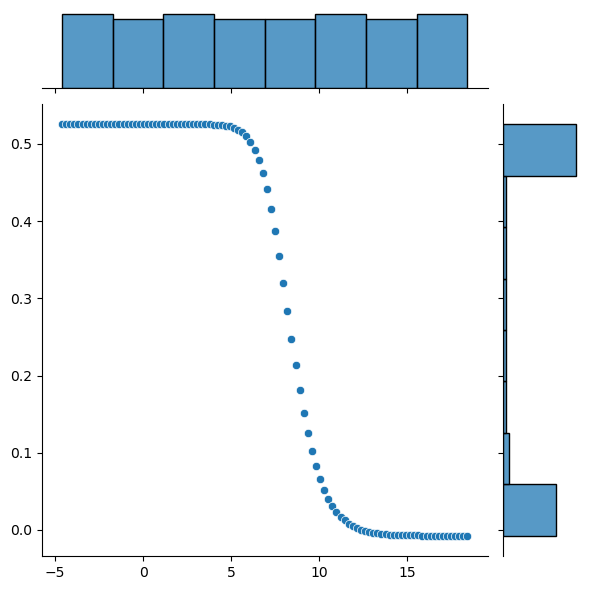

In [50]:
# To create a joint plot to visualize the relationship between the log of alpha values and the mean of testing scores
sns.jointplot(x=np.log(param_range), y=ridge_test_mean)

In [51]:
# Finding the index where the maximum test mean occurs in the array of test_mean
Ridge_best_index = np.where(ridge_test_mean==max(ridge_test_mean))

# print index of best fir for ridge regression
print(Ridge_best_index)

(array([29], dtype=int64),)


In [52]:
# Creating a Ridge regression model with the alpha value corresponding to the index 29 in the param_range array
Ridge_Reg_best = Ridge(alpha=param_range[29])

# Fitting the Ridge regression model with the best alpha value to the (x_train_scaler) and the training target values (y_train)
Ridge_Reg_best.fit(x_train_scaler, y_train)

Ridge(alpha=8.497534359086439)

In [53]:
# Predict the target variable for the train and test dataset using the trained ridge regression model for best fit
Ridge_best_y_train_pred = Ridge_Reg_best.predict(x_train_scaler)
Ridge_best_y_test_pred = Ridge_Reg_best.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m Ridge_best_y_train_pred \033[0m"), "\n", Ridge_best_y_train_pred, "\n")
print(("\033[1m Ridge_best_y_test_pred \033[0m"), "\n", Ridge_best_y_test_pred, "\n")

 Ridge_best_y_train_pred  
 [98355.26832551 74122.32906027 79236.29235724 ... 70678.26358763
 66363.33449915 64132.89633227] 

 Ridge_best_y_test_pred  
 [69095.50730184 64242.12325722 63726.26038823 71996.77490928
 76669.5112278  88746.02730605 69241.95755241 71365.80119992
 70962.55558624 73628.76377524 72266.39395936 78589.17914904
 85423.25973216 78105.49314811 77082.5348357  93977.30609088
 66390.81789709 69033.59788718 67274.66978267 81792.18455338
 91159.02677193 96564.74678579 71202.72655087 67477.0598614
 72583.94821288 68297.23816097 73626.9166827  94518.23298812
 72136.53525538 74400.33450499 68999.98119368 69950.7422078
 85477.681725   80546.87230229 98686.27802114 80327.26292202
 71370.77568155 80782.31532604 74025.05727628 65809.52281195
 71495.57073073 87874.5065289  73030.89985442 67852.99733506
 74960.84283693 78204.1965947  86494.40508545 68166.39693126
 69477.27913557 76641.94213007 90162.26509186 69750.7817991
 91564.071361   73121.60289566 89852.72082456 69482.7092

##### 3.3.2 Performance evaluation for Ridge regression for alpha=best fit
##### 3.3.2.1 Calculation of MSE for train and test dataset

In [54]:
# Calculate mean squared error for training dataset of ridge regression for best fit
Ridge_best_train_mse = mean_squared_error(y_train, Ridge_best_y_train_pred)

# Print "MSE" of train dataset for ridge regression for best fit
print(Ridge_best_train_mse) 

75027601.72500345


In [55]:
# Calculate mean squared error for testing dataset of ridge regression for best fit
Ridge_best_test_mse = mean_squared_error(y_test, Ridge_best_y_test_pred)

# Print "MSE" of test dataset for ridge regression for best fit
print(Ridge_best_test_mse) 

68765057.54122409


##### 3.3.2.2 Calculation of MAE for train and test dataset at alpha=best fit

In [56]:
# Calculate mean absolute error for training dataset of ridge regression for best fit
Ridge_best_train_mae = mean_absolute_error(y_train, Ridge_best_y_train_pred)

# Print "MAE" of train dataset for ridge regression for best fit
print(Ridge_best_train_mae)

6865.686236349224


In [57]:
# Calculate mean absolute error for testing dataset of ridge regression at best fit
Ridge_best_test_mae = mean_absolute_error(y_test, Ridge_best_y_test_pred)

# Print "MAE" of test dataset for ridge regression at best fit
print(Ridge_best_test_mae)

6586.831524243591


##### 3.3.2.3 Calculation of R-square for train and test dataset at alpha=best fit

In [58]:
# R-squared score calculation for the train dataset's for actual values (y_train) and predicted values (Ridge_best_y_train_pred)
Ridge_best_train_R_score = r2_score(y_train, Ridge_best_y_train_pred)

## Print R-squared of train dataset for ridge regression at best fit
print(Ridge_best_train_R_score)

0.5334943053166195


In [59]:
# R-squared score calculation for the test dataset's for actual values (y_train) and predicted values (Ridge_best_y_test_pred)
Ridge_best_test_R_score = r2_score(y_test, Ridge_best_y_test_pred)

## Print R-squared of test dataset for ridge regression at best fit
print(Ridge_best_test_R_score)

0.5365749219015963


##### 3.3.2.4 Checking for overfitting and underfitting at alpha=best fit

In [60]:
# Check for overfitting
if Ridge_best_train_R_score > Ridge_best_test_R_score + 0.15:  # Example threshold for overfitting
    print("The 'Ridge Regression at best fit' trained model is overfitting.")
elif Ridge_best_train_R_score < Ridge_best_test_R_score - 0.15: # Example threshold for overfitting
    print("The 'Ridge Regression at best fit' trained model is underfitting.")
else:
    print("The 'Ridge Regression at best fit' trained model is Well-fitted.")

The 'Ridge Regression at best fit' trained model is Well-fitted.


### 3.4 Lasso Regression (alpha=0.4)
##### 3.4.1 Performing lasso regression by using sklearn model on "y_train" and "x_train" varaibles 

In [61]:
# Importing the Lasso regression model from the sklearn.linear_model module
from sklearn.linear_model import Lasso

# Creating a Lasso regression model with regularization parameter alpha set to 0.4
Lasso_Reg = Lasso(alpha=0.4)

# Fitting the Lasso regression model to the standardized training data (x_train_scaler) and the training target values (y_train)
Lasso_Reg.fit(x_train_scaler, y_train)

Lasso(alpha=0.4)

In [62]:
# Predict the target variable for the train and test dataset using the trained ridge regression model
Lasso_y_train_pred = Lasso_Reg.predict(x_train_scaler)
Lasso_y_test_pred = Lasso_Reg.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m Lasso_y_train_pred \033[0m"), "\n", Lasso_y_train_pred, "\n")
print(("\033[1m Lasso_y_test_pred \033[0m"), "\n", Lasso_y_test_pred, "\n")

 Lasso_y_train_pred  
 [98450.55624385 74123.40283673 79270.10897028 ... 70662.15321087
 66320.26433544 64080.14808312] 

 Lasso_y_test_pred  
 [69072.60146129 64186.75840633 63669.85196461 71988.1410787
 76685.72372074 88788.36466862 69216.35109784 71352.58378562
 70941.64330935 73630.49934507 72260.02655559 78621.85495603
 85442.77610226 78135.99392653 77100.01353583 94046.94890921
 66349.4094561  69005.51224064 67239.96399012 81839.65365921
 91213.25578143 96648.26371458 71186.86246694 67442.08025063
 72577.62361053 68268.62972203 73630.60121196 94590.72096775
 72130.91386832 74404.2503398  68974.06984939 69926.93356275
 85499.05073828 80587.552686   98784.9318968  80366.15796477
 71357.55617674 80777.03829991 74026.95564839 65763.63969315
 71481.5539299  87911.99839467 73025.76932339 67818.04438389
 74971.06211629 78228.63888769 86523.76803761 68135.04042831
 69449.98350559 76660.10844552 90207.42597299 69732.09430904
 91620.16537224 73120.66240577 89893.43830952 69459.1330181
 683

##### 3.4.2 Performance evaluation for Lasso regression at alpha=0.4
##### 3.4.2.1 Calculation of MSE for train and test dataset at alpha=0.4

In [63]:
# Calculate mean squared error for training dataset of lasso regression
Lasso_train_mse = mean_squared_error(y_train, Lasso_y_train_pred)

# Print "MSE" of train dataset for lasso regression
print(Lasso_train_mse) 

75026072.50622334


In [64]:
# Calculate mean squared error for testing dataset of lasso regression
Lasso_test_mse = mean_squared_error(y_test, Lasso_y_test_pred)

# Print "MSE" of test dataset for lasso regression
print(Lasso_test_mse) 

68750618.11324519


##### 3.4.2.2 Calculation of MAE for train and test dataset at alpha=0.4

In [65]:
# Calculate mean absolute error for training dataset of Lasso regression
Lasso_train_mae = mean_absolute_error(y_train, Lasso_y_train_pred)

# Print "MAE" of train dataset for Lasso regression
print(Lasso_train_mae)

6864.305168646878


In [66]:
# Calculate mean absolute error for testing dataset of Lasso regression
Lasso_test_mae = mean_absolute_error(y_test, Lasso_y_test_pred)

# Print "MAE" of test dataset for Lasso regression
print(Lasso_test_mae)

6585.630633356237


##### 3.4.2.3 Calculation of R-square for train and test dataset at alpha=0.4

In [67]:
# R-squared score calculation for the train dataset's for actual values (y_train) and predicted values (Lasso_y_train_pred)
Lasso_train_R_score = r2_score(y_train, Lasso_y_train_pred)

## Print R-squared of train dataset for Lasso regression
print(Lasso_train_R_score)

0.5335038136742496


In [68]:
# R-squared score calculation for the test dataset's for actual values (y_train) and predicted values (Lasso_y_test_pred)
Lasso_test_R_score = r2_score(y_test, Lasso_y_test_pred)

## Print R-squared of test dataset for Lasso regression
print(Lasso_test_R_score)

0.5366722328510536


##### 3.4.2.4 Checking for overfitting and underfitting at alpha=0.4

In [69]:
# Check for overfitting
if Lasso_train_R_score > Lasso_test_R_score + 0.15:    # Example threshold for overfitting
    print("The 'Lasso Regression at alpha=0.4' trained model is overfitting.")
elif Lasso_train_R_score < Lasso_test_R_score - 0.15:  # Example threshold for overfitting
    print("The 'Lasso Regression at alpha=0.4' trained model is underfitting.")
else:
    print("The 'Lasso Regression at alpha=0.4' trained model is Well-fitted.")

The 'Lasso Regression at alpha=0.4' trained model is Well-fitted.


### 3.5 Lasso Regression (alpha=best fit)
##### 3.5.1 Performing lasso regression by using sklearn model on "y_train" and "x_train" varaibles at best fit for alpha value

In [70]:
# Calculate the training and testing scores for different alpha values using validation_curve
# Lasso() is used as the estimator, x_train_s and y_train are the training data, 
# param_name specifies the hyperparameter to vary (alpha in this case),
# param_range specifies the range of values to test for the specified hyperparameter,
# scoring specifies the evaluation metric (R-squared in this case)
lasso_train_scores, lasso_test_scores = validation_curve(Lasso(), x_train_scaler, y_train, 
                                              param_name="alpha", param_range=param_range, 
                                              scoring="r2")

# Calculate the mean of training and testing scores across all folds for each alpha value
lasso_train_mean = np.mean(lasso_train_scores, axis=1)
lasso_test_mean = np.mean(lasso_test_scores, axis=1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


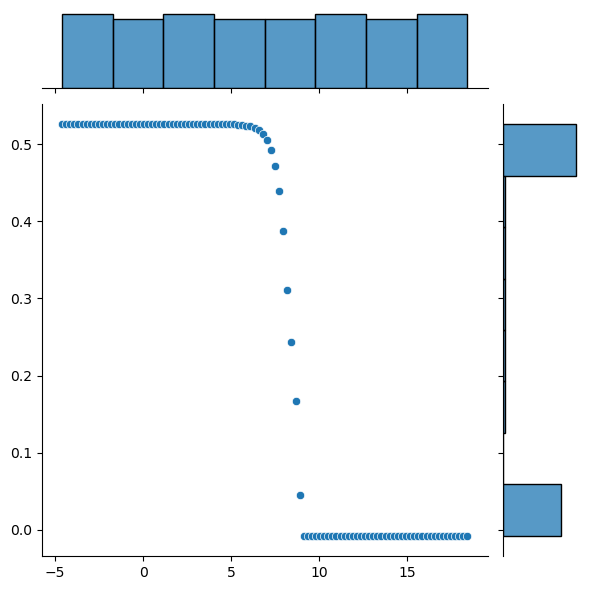

In [71]:
# To create a joint plot to visualize the relationship between the log of alpha values and the mean of testing scores
sns.jointplot(x=np.log(param_range), y=lasso_test_mean)

In [72]:
# Finding the index where the maximum test mean occurs in the array of test_mean
Lasso_best_index = np.where(lasso_test_mean==max(lasso_test_mean))

# print index of best fit for ridge regression
print(Lasso_best_index)

(array([39], dtype=int64),)


In [73]:
# Creating a Lasso regression model with the alpha value corresponding to the index 39 in the param_range array
Lasso_Reg_best = Lasso(alpha=param_range[39])

# Fitting the Lasso regression model with the best alpha value to the (x_train_scaler) and the training target values (y_train)
Lasso_Reg_best.fit(x_train_scaler, y_train)

Lasso(alpha=86.97490026177834)

In [74]:
# Predict the target variable for the train and test dataset using the trained Lasso regression model for best fit
Lasso_best_y_train_pred = Lasso_Reg_best.predict(x_train_scaler)
Lasso_best_y_test_pred = Lasso_Reg_best.predict(x_test_scaler)

# Print the predicted values for the train and test dataset
print(("\033[1m Lasso_best_y_train_pred \033[0m"), "\n", Lasso_best_y_train_pred, "\n")
print(("\033[1m Lasso_best_y_test_pred \033[0m"), "\n", Lasso_best_y_test_pred, "\n")

 Lasso_best_y_train_pred  
 [97926.3261043  74214.85863394 79240.61850646 ... 70535.51410738
 66629.83642671 64276.36144701] 

 Lasso_best_y_test_pred  
 [69019.32743149 64390.06818848 63587.29258814 72168.24292592
 76608.98604312 88923.58994316 69305.93437549 71482.30287212
 71156.09740974 73843.13741838 72395.86990342 78532.5762882
 85585.80505652 78179.47849827 77061.46290607 93557.99356059
 66167.63359982 68833.72964883 67322.22096712 81421.47616274
 90865.88638524 96313.7819451  71379.22458596 67397.85400651
 72740.50772305 68336.07790772 73549.58801037 94164.92702568
 72405.75534849 74438.22781471 69004.48842128 69881.85456875
 85353.25298688 80530.92014559 98338.45945427 79983.04030234
 71297.36925238 80933.91903263 73822.62917077 66086.05098589
 71650.29231998 87694.84974898 73132.59437799 67701.3842238
 74871.04378639 77932.03328942 86763.15092251 67921.98489679
 69531.19284537 76658.39632339 89887.58066155 69813.32597678
 91435.45650712 73086.55949198 89463.84936705 69680.944

##### 3.5.2 Performance evaluation for Lasso regression for alpha=best fit
##### 3.5.2.1 Calculation of MSE for train and test dataset

In [75]:
# Calculate mean squared error for training dataset of Lasso regression for best fit
Lasso_best_train_mse = mean_squared_error(y_train, Lasso_best_y_train_pred)

# Print "MSE" of train dataset for Lasso regression for best fit
print(Lasso_best_train_mse) 

75080196.39242965


In [76]:
# Calculate mean squared error for testing dataset of Lasso regression for best fit
Lasso_best_test_mse = mean_squared_error(y_test, Lasso_best_y_test_pred)

# Print "MSE" of test dataset for Lasso regression for best fit
print(Lasso_best_test_mse) 

68643397.78653114


##### 3.5.2.2 Calculation of MAE for train and test dataset at alpha=best fit

In [77]:
# Calculate mean absolute error for training dataset of Lasso regression for best fit
Lasso_best_train_mae = mean_absolute_error(y_train, Lasso_best_y_train_pred)

# Print "MAE" of train dataset for Lasso regression for best fit
print(Lasso_best_train_mae)

6865.311034511991


In [78]:
# Calculate mean absolute error for testing dataset of Lasso regression at best fit
Lasso_best_test_mae = mean_absolute_error(y_test, Lasso_best_y_test_pred)

# Print "MAE" of test dataset for Lasso regression at best fit
print(Lasso_best_test_mae)

6583.4198960612275


##### 3.5.2.3 Calculation of R-square for train and test dataset at alpha=best fit

In [79]:
# R-squared score calculation for the train dataset's for actual values (y_train) and predicted values (Lasso_best_y_train_pred)
Lasso_best_train_R_score = r2_score(y_train, Lasso_best_y_train_pred)

## Print R-squared of train dataset for Lasso regression at best fit
print(Lasso_best_train_R_score)

0.5331672828435536


In [80]:
# R-squared score calculation for the test dataset's for actual values (y_test) and predicted values (Lasso_best_y_test_pred)
Lasso_best_test_R_score = r2_score(y_test, Lasso_best_y_test_pred)

## Print R-squared of test dataset for Lasso regression at best fit
print(Lasso_best_test_R_score)

0.5373948176936738


##### 3.5.2.4 Checking for overfitting and underfitting at alpha=best fit

In [81]:
# Check for overfitting
if Lasso_best_train_R_score > Lasso_best_test_R_score + 0.15:    # Example threshold for overfitting
    print("The 'Lasso Regression at best fit' trained model is overfitting.")
elif Lasso_best_train_R_score < Lasso_best_test_R_score - 0.15:  # Example threshold for overfitting
    print("The 'Lasso Regression at best fit' trained model is underfitting.")
else:
    print("The 'Lasso Regression at best fit' trained model is Well-fitted.")

The 'Lasso Regression at best fit' trained model is Well-fitted.


### 3.6 Random Forest
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
##### 3.6.1 Performing Random Forest regression by using sklearn model on "y_train" and "x_train" varaibles 

In [82]:
# Importing the RandomForestRegressor model from the sklearn.linear_model module
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of RandomForestRegressor
RF_Reg = RandomForestRegressor(n_estimators=500, n_jobs=1, random_state=42)

# Now fit your RandomForestRegressor
RF_Reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=1, random_state=42)

In [83]:
# Predict the target variable for the train and test dataset using the trained random forest regression model
RF_y_train_pred = RF_Reg.predict(x_train)
RF_y_test_pred = RF_Reg.predict(x_test)

# Print the predicted values for the train and test dataset
print(("\033[1m RF_y_train_pred \033[0m"), "\n", RF_y_train_pred, "\n")
print(("\033[1m RF_y_test_pred \033[0m"), "\n", RF_y_test_pred, "\n")

 RF_y_train_pred  
 [104661.22522  73321.42206  78826.6503  ...  68221.17336  68501.44304
  69224.05936] 

 RF_y_test_pred  
 [ 66478.99604  70522.30746  70240.1356   76994.79186  74183.92934
  87891.7787   70245.24306  76622.51282  65808.70802  74590.05174
  68565.43612  75571.54926  90990.8521   75456.46542  74728.71648
 101564.30518  66066.91362  67557.5678   69970.24046  80998.26608
  97554.91746 106520.43708  69911.7582   70423.9139   69629.29088
  72266.59762  70322.32088 103462.22458  74228.06808  73866.2192
  64820.27206  65789.97268  77002.39458  83237.8448  103051.97652
  83203.24184  65227.29706  74873.82992  65559.55012  67150.29122
  71506.40886  75586.09574  72785.78     64402.69492  72789.74548
  71144.08062  73141.39686  69358.92504  65697.8203   74620.58626
 107530.83282  76441.86994  99656.42764  76378.39942  96654.54156
  68565.83422  69218.64634  75270.40984  69897.96158  67445.56438
  77529.5781   77739.90182  69639.60266  64504.89584  67179.85092
  76513.27496  67

##### 3.6.2 Performance evaluation for Random Forest 
##### 3.6.2.1 Calculation of MSE for train and test dataset 

In [84]:
# Calculate mean squared error for training dataset of random forest regression
RF_train_mse = mean_squared_error(y_train, RF_y_train_pred)

# Print "MSE" of train dataset for random forest regression
print(RF_train_mse) 

7998323.874084605


In [85]:
# Calculate mean squared error for testing dataset of random forest regression
RF_test_mse = mean_squared_error(y_test, RF_y_test_pred)

# Print "MSE" of test dataset for random forest regression
print(RF_test_mse) 

50945615.28318826


##### 3.6.2.2 Calculation of MAE for train and test dataset 

In [86]:
# Calculate mean absolute error for training dataset of random forest regression
RF_train_mae = mean_absolute_error(y_train, RF_y_train_pred)

# Print "MAE" of train dataset for random forest regression
print(RF_train_mae)

2197.287169079471


In [87]:
# Calculate mean absolute error for testing dataset of random forest regression
RF_test_mae = mean_absolute_error(y_test, RF_y_test_pred)

# Print "MAE" of test dataset for random forest regression
print(RF_test_mae)

5448.541630566031


##### 3.6.2.3 Calculation of R-square for train and test dataset 

In [88]:
# R-square calculation for the train dataset's for actual values (y_train) and predicted values (RF_y_train_pred)
RF_train_R_score = r2_score(y_train, RF_y_train_pred)

# Print R-square of train dataset for random forest regression
print(RF_train_R_score)

0.9502681206729944


In [89]:
# R-square calculation for the test dataset's for actual values (y_test) and predicted values (RF_y_test_pred)
RF_test_R_score = r2_score(y_test, RF_y_test_pred)

# Print R-square of test dataset for random forest regression
print(RF_test_R_score)

0.6566646406537352


##### 3.6.2.4 Checking for overfitting and underfitting 

In [90]:
# Check for overfitting
if RF_train_R_score > RF_test_R_score + 0.15:  # Example threshold for overfitting
    print("The 'Random Forest Regression' trained model is overfitting.")
elif RF_train_R_score < RF_test_R_score - 0.15:  # Example threshold for underfitting
    print("The 'Random Forest Regression' trained model is underfitting.")
else:
    print("The 'Random Forest Regression' trained model is Well-fitted.")  

The 'Random Forest Regression' trained model is overfitting.


### 3.7 Grid Search technique for Random forest 
#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
##### 3.7.1 Performing Grid Search technique for Random forest by using sklearn model on "y_train" and "x_train" varaibles 

In [91]:
# Import GridSearchCV libraries from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# Initialize a RandomForestRegressor with 250 estimators and a fixed random state for reproducibility
GS_RF_Reg = RandomForestRegressor(n_estimators=500, random_state=42)

# Define a grid of hyperparameters to search over
params_grid = {"max_features": [4, 5, 6, 7, 8, 9, 10],  # The number of features to consider when looking for the best split
               "min_samples_split": [2, 3, 10]}         # The minimum number of samples required to split an internal node

##### Grid search for Random forest regression is taking little time for execution

In [92]:
# Initialize GridSearchCV with the RandomForestRegressor, parameter grid, and other necessary settings
grid_search = GridSearchCV(GS_RF_Reg, params_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Assuming X_train and y_train are your training features and labels, fit the GridSearchCV
grid_search.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=500, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [93]:
# calculate the parameters found in grid search for random forest regression
best_param = grid_search.best_params_

# Print the best parameters
print("Best parameters found: ", best_param)

Best parameters found:  {'max_features': 4, 'min_samples_split': 2}


In [94]:
# Predict the target variable for the train and test dataset using the grid search for random forest regression model
GS_RF_y_train_pred = grid_search.predict(x_train)
GS_RF_y_test_pred = grid_search.predict(x_test)

# Print the predicted values for the train and test dataset
print(("\033[1m GS_RF_y_train_pred \033[0m"), "\n", GS_RF_y_train_pred, "\n")
print(("\033[1m GS_RF_y_test_pred \033[0m"), "\n", GS_RF_y_test_pred, "\n")

 GS_RF_y_train_pred  
 [103485.12482  74014.68264  78683.20702 ...  69097.05634  67855.45086
  69585.7528 ] 

 GS_RF_y_test_pred  
 [ 69501.72522  70521.31676  68391.77628  76536.63426  74807.78226
  84174.66424  70649.92336  73959.0528   67252.59284  73924.47974
  68560.91256  74212.20786  89177.21706  77078.42556  74434.47552
 102524.50284  67533.6345   67556.307    68208.62384  77502.79914
  96983.12852 105305.48956  68684.90194  68913.46826  71918.7032
  71807.921    67970.50582 103565.44606  73894.48578  73934.59098
  65839.50968  69763.5832   78597.50594  80606.59038 101278.32402
  77624.03954  65453.60492  80104.30416  65029.87562  66597.5788
  70517.90184  77785.41972  72185.08178  67388.75044  71661.8112
  70873.04498  77849.82108  67112.18648  64917.33722  74521.2928
  99579.86136  74989.42832  97923.23452  76198.12172  96777.30884
  66635.52932  68130.73264  77902.51166  68999.98632  68967.31016
  76163.68184  76102.4813   70570.0694   65593.77514  66124.6156
  73400.13724  

##### 3.7.2 Performance evaluation for grid search technique for Random Forest 
##### 3.7.2.1 Calculation of MSE for train and test dataset 

In [95]:
# Calculate mean squared error for training dataset of grid search for random forest regression
GS_RF_train_mse = mean_squared_error(y_train, GS_RF_y_train_pred)

# Print "MSE" of train dataset of grid search for random forest regression
print(GS_RF_train_mse) 

8200496.292585353


In [96]:
# Calculate mean squared error for testing dataset of grid search for random forest regression
GS_RF_test_mse = mean_squared_error(y_test, GS_RF_y_test_pred)

# Print "MSE" of test dataset of grid search for random forest regression
print(GS_RF_test_mse) 

54304270.948153585


##### 3.7.2.2 Calculation of MAE for train and test dataset 

In [97]:
# Calculate mean absolute error for training dataset of grid search for random forest regression
GS_RF_train_mae = mean_absolute_error(y_train, GS_RF_y_train_pred)

# Print "MAE" of train dataset of grid search for random forest regression
print(GS_RF_train_mae)

2252.4561927930695


In [98]:
# Calculate mean absolute error for testing dataset of grid search for random forest regression
GS_RF_test_mae = mean_absolute_error(y_test, GS_RF_y_test_pred)

# Print "MAE" of test dataset of grid search for random forest regression
print(GS_RF_test_mae)

5673.983118238981


##### 3.7.2.3 Calculation of R-square for train and test dataset 

In [99]:
# R-score calculation for the train dataset's for actual values (y_train) and predicted values (GS_RF_y_train_pred)
GS_RF_train_R_score = r2_score(y_train, GS_RF_y_train_pred)

# Print R-score of train dataset of grid search for random forest regression
print(GS_RF_train_R_score)

0.9490110555080409


In [100]:
# R-score calculation for the test dataset's for actual values (y_test) and predicted values (GS_RF_y_test_pred)
GS_RF_test_R_score = r2_score(y_test, GS_RF_y_test_pred)

# Print R-score of test dataset of grid search for random forest regression
print(GS_RF_test_R_score)

0.6340298124503398


##### 3.7.2.4 Checking for overfitting and underfitting 

In [101]:
# Check for overfitting
if GS_RF_train_R_score > GS_RF_test_R_score + 0.15:  # Example threshold for overfitting
    print("The 'Grid search of Random Forest Regression' trained model is overfitting.")
elif GS_RF_train_R_score < GS_RF_test_R_score - 0.15:  # Example threshold for underfitting
    print("The 'Grid search of Random Forest Regression' trained model is underfitting.")
else:
    print("The 'Grid search of Random Forest Regression' trained model is Well-fitted.")    

The 'Grid search of Random Forest Regression' trained model is overfitting.


### 3.8 Gradient Boosting
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
##### 3.8.1 Performing Gradient boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [102]:
# import GradientBoostingRegressor from sklearn.ensemble model
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of GradientBoostingRegressor
GB_Reg = GradientBoostingRegressor()

# Fit the GradientBoostingRegressor model to the training data
GB_Reg.fit(x_train, y_train)

GradientBoostingRegressor()

In [103]:
# Predict the target variable for the train and test dataset using the trained Gradient boosting model
GB_y_train_pred = GB_Reg.predict(x_train)
GB_y_test_pred = GB_Reg.predict(x_test)

# Print the predicted values for the train and test dataset
print(("\033[1m GB_y_train_pred \033[0m"), "\n", GB_y_train_pred, "\n")
print(("\033[1m GB_y_test_pred \033[0m"), "\n", GB_y_test_pred, "\n")

 GB_y_train_pred  
 [105824.3333976   71908.0673662   77490.98375883 ...  70332.89028498
  66790.29443541  68460.49909792] 

 GB_y_test_pred  
 [ 69763.32371336  67737.32774032  70917.68254199  73411.40994025
  73774.88282702  86367.56895565  70296.85251689  71212.98046984
  65419.18148589  73793.70991063  71000.65729995  76459.42988531
  87198.35106406  77252.17027884  74187.45309239 101607.32975362
  67639.57148043  68331.84977237  67939.10332492  82415.07720236
  98300.85329637 105748.08282297  68582.54967857  67880.68652909
  70889.91813669  67733.08748787  74366.73772216 103598.19156728
  74922.05301477  73488.78118049  67146.49415737  66088.80378165
  77045.79690768  79580.69568996 105494.41458463  75989.87346453
  67082.4275055   73976.31213968  65361.64585628  67523.19976232
  68558.97670158  75369.29668224  72921.68003365  65738.92583844
  75291.69113434  68763.90924016  76957.84389597  68079.53603017
  68816.54214734  73084.77699687  99139.21094035  74221.39739108
 100318.379

##### 3.8.2 Performance evaluation for Gradient boosting
##### 3.8.2.1 Calculation of MSE for train and test dataset 

In [104]:
# Calculate mean squared error for training dataset of gradient boosting
GB_train_mse = mean_squared_error(y_train, GB_y_train_pred)

# Print "MSE" of train dataset for gradient boosting
print(GB_train_mse) 

44628728.61081262


In [105]:
# Calculate mean squared error for testing dataset of gradient boosting
GB_test_mse = mean_squared_error(y_test, GB_y_test_pred)

# Print "MSE" of test dataset for gradient boosting
print(GB_test_mse) 

56631620.80088641


##### 3.8.2.2 Calculation of MAE for train and test dataset 

In [106]:
# Calculate mean absolute error for training dataset of gradient boosting
GB_train_mae = mean_absolute_error(y_train, GB_y_train_pred)

# Print "MAE" of train dataset for gradient boosting
print(GB_train_mae)

5232.094338168432


In [107]:
# Calculate mean absolute error for testing dataset of gradient boosting
GB_test_mae = mean_absolute_error(y_test, GB_y_test_pred)

# Print "MAE" of test dataset for gradient boosting
print(GB_test_mae)

5890.025446208703


##### 3.8.2.3 Calculation of R-sqaure for train and test dataset 

In [108]:
# R-square calculation for the train dataset's for actual values (y_train) and predicted values (GB_y_train_pred)
GB_train_R_score = r2_score(y_train, GB_y_train_pred)

# Print R-square of train dataset for gradient boosting
print(GB_train_R_score)

0.7225080428435853


In [109]:
# R-square calculation for the test dataset's for actual values (y_test) and predicted values (GB_y_test_pred)
GB_test_R_score = r2_score(y_test, GB_y_test_pred)

# Print R-square of test dataset for gradient boosting
print(GB_test_R_score)

0.6183452144025824


##### 3.8.2.4 Checking for overfitting and underfitting 

In [110]:
# Check for overfitting
if GB_train_R_score > GB_test_R_score + 0.15:  # Example threshold for overfitting
    print("The 'Gradient boosting' trained model is overfitting.")
elif GB_train_R_score < GB_test_R_score - 0.15:  # Example threshold for underfitting
    print("The 'Gradient boosting' trained model is underfitting.")
else:
    print("The 'Gradient boosting' trained model is Well-fitted.")

The 'Gradient boosting' trained model is Well-fitted.


### 3.9 Ada boosting
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
##### 3.9.1 Performing  Ada boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [111]:
# import AdaBoostRegressor from sklearn.ensemble model
from sklearn.ensemble import AdaBoostRegressor

# Create an instance of AdaBoostRegressor with specified parameters at learning_rate=0.02 and n_estimators=1000
Ada_Reg = AdaBoostRegressor(learning_rate=0.02, n_estimators=1000)

# Fit the AdaBoostRegressor model to the training data
Ada_Reg.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.02, n_estimators=1000)

In [112]:
# Predict the target variable for the train and test dataset using the trained Ada boosting model
Ada_y_train_pred = Ada_Reg.predict(x_train)
Ada_y_test_pred = Ada_Reg.predict(x_test)

# Print the predicted values for the train and test dataset
print(("\033[1m Ada_y_train_pred \033[0m"), "\n", Ada_y_train_pred, "\n")
print(("\033[1m Ada_y_test_pred \033[0m"), "\n", Ada_y_test_pred, "\n")

 Ada_y_train_pred  
 [106360.80162791  70455.98544186  78407.3948227  ...  70142.0396109
  68162.43744     69027.75190058] 

 Ada_y_test_pred  
 [ 75374.1816879   68171.51795824  68383.92629032  76965.66414729
  74411.63323782  87724.91045161  71241.7712      75647.68063158
  70527.98412048  75317.61012448  70517.26058442  78114.362
  88879.81024691  78019.95604082  76068.06127273 103300.45373984
  68602.39770718  68799.13024324  68771.86828638  79352.5044958
  91837.65028986 104493.42631579  68757.98412245  68730.50681818
  71165.22367059  68454.33596535  78580.48964789 103553.19595745
  76835.83685801  75831.74960227  68222.80277273  68304.99207661
  78706.11963855  78155.86282511  93465.2912605   79151.26561688
  68676.65386139  78238.53773196  71169.33053571  68402.28795652
  70527.98412048  78895.52710526  71995.11198238  68171.51795824
  78553.63259786  72673.8528      79062.16        68814.07730435
  68322.98760085  74128.24971098 101974.48        76886.34716867
 103223.69688525

##### 3.9.2 Performance evaluation for Ada boosting
##### 3.9.2.1 Calculation of MSE for train and test dataset 

In [113]:
# Calculate mean squared error for training dataset of ada boosting
Ada_train_mse = mean_squared_error(y_train, Ada_y_train_pred)

# Print "MSE" of train dataset for ada boosting
print(Ada_train_mse) 

60114691.12420472


In [114]:
# Calculate mean squared error for testing dataset of ada boosting
Ada_test_mse = mean_squared_error(y_test, Ada_y_test_pred)

# Print "MSE" of test dataset for ada boosting
print(Ada_test_mse) 

59320902.67070749


##### 3.9.2.2 Calculation of MAE for train and test dataset 

In [115]:
# Calculate mean absolute error for training dataset of ada boosting
Ada_train_mae = mean_absolute_error(y_train, Ada_y_train_pred)

# Print "MAE" of train dataset for ada boosting
print(Ada_train_mae)

6255.300798000435


In [116]:
# Calculate mean absolute error for testing dataset of ada boosting
Ada_test_mae = mean_absolute_error(y_test, Ada_y_test_pred)

# Print "MAE" of test dataset for ada boosting
print(Ada_test_mae)

6025.110230760575


##### 3.9.2.3 Calculation of R-sqaure for train and test dataset 

In [117]:
# R-square calculation for the train dataset's for actual values (y_train) and predicted values (Ada_y_train_pred)
Ada_train_R_score = r2_score(y_train, Ada_y_train_pred)

# Print R-square of train dataset for ada boosting
print(Ada_train_R_score)

0.6262196165304298


In [118]:
# R-square calculation for the test dataset's for actual values (y_test) and predicted values (Ada_y_test_pred)
Ada_test_R_score = r2_score(y_test, Ada_y_test_pred)

# Print R-square of test dataset for ada boosting
print(Ada_test_R_score)

0.6002214651451442


##### 3.9.2.4 Checking for overfitting and underfitting 

In [119]:
# Check for overfitting
if Ada_train_R_score > Ada_test_R_score + 0.15:  # Example threshold for overfitting
    print("The 'ADA boosting' trained model is overfitting.")
elif Ada_train_R_score < Ada_test_R_score - 0.15:  # Example threshold for underfitting
    print("The 'ADA boosting' trained model is underfitting.")
else:
    print("The 'ADA boosting' trained model is Well-fitted.")

The 'ADA boosting' trained model is Well-fitted.


### 3.10 XG Boost
#### https://xgboost.readthedocs.io/en/stable/get_started.html
##### 3.10.1 Performing  Ada boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [120]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [121]:
import xgboost as xgb  # import Xgboost

# Create an XGBoost Regressor with specified hyperparameters
Xgb_Reg = xgb.XGBRegressor(max_depth=5, n_estimators=5000, learning_rate=0.3, n_jobs=-1)

# Fit the XGBoost model with x_train and y_train for int data type
Xgb_Reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
# Predict the target variable for the train and test dataset using the trained XG boosting model
Xgb_y_train_pred = Xgb_Reg.predict(x_train)
Xgb_y_test_pred = Xgb_Reg.predict(x_test)

# Print the predicted values for the train and test dataset
print(("\033[1m Xgb_y_train_pred \033[0m"), "\n", Xgb_y_train_pred, "\n")
print(("\033[1m Xgb_y_test_pred \033[0m"), "\n", Xgb_y_test_pred, "\n")

 Xgb_y_train_pred  
 [102928.695  76811.414  77733.27  ...  67304.63   68107.125  71017.53 ] 

 Xgb_y_test_pred  
 [ 67783.74   69223.41   73655.86   77902.37   73796.125  86141.516
  72626.95   73337.68   67002.18   73899.2    64499.04   74865.695
  93604.45   71841.695  67795.36  101974.664  67811.54   72262.766
  75302.77   85650.85   99145.375 107621.5    73507.664  61955.348
  70055.945  74544.57   64320.676 105105.57   76037.79   73942.13
  72062.6    61338.324  84805.65   81655.984 114397.016  83024.375
  60468.117  71334.32   64162.176  72051.055  69796.445  76768.78
  69408.88   62695.312  72810.68   69678.234  80992.89   73165.66
  74261.65   71107.65  117557.555  75904.28  101078.38   70019.38
  96666.39   72891.94   69982.43   67952.88   72504.39   69905.375
  74521.7    81225.96   67078.72   60240.113  67171.81   72435.84
  72683.305  61675.81   92220.84   73029.914  74421.49   66561.375
  69484.27   73141.055  73898.43   85648.484  72443.39   69867.484
  69065.36   61431.

##### 3.10.2 Performance evaluation for Xgb boosting
##### 3.10.2.1 Calculation of MSE for train and test dataset 

In [123]:
# Calculate mean squared error for training dataset of xgb boosting
Xgb_train_mse = mean_squared_error(y_train, Xgb_y_train_pred)

# Print "MSE" of train dataset for xgb boosting
print(Xgb_train_mse) 

0.0013705281543412863


In [124]:
# Calculate mean squared error for testing dataset of xgb boosting
Xgb_test_mse = mean_squared_error(y_test, Xgb_y_test_pred)

# Print "MSE" of test dataset for xgb boosting
print(Xgb_test_mse) 

63109961.93027724


##### 3.10.2.2 Calculation of MAE for train and test dataset 

In [125]:
# Calculate mean absolute error for training dataset of XGb boosting
Xgb_train_mae = mean_absolute_error(y_train, Xgb_y_train_pred)

# Print "MAE" of train dataset for Xgb boosting
print(Xgb_train_mae)

0.023422870770697907


In [126]:
# Calculate mean absolute error for testing dataset of XGb boosting
Xgb_test_mae = mean_absolute_error(y_test, Xgb_y_test_pred)

# Print "MAE" of test dataset for Xgb boosting
print(Xgb_test_mae)

5612.5557252358485


##### 3.10.2.3 Calculation of R-sqaure for train and test dataset 

In [127]:
# R-square calculation for the train dataset's for actual values (y_train) and predicted values (XGb_y_train_pred)
Xgb_train_R_score = r2_score(y_train, Xgb_y_train_pred)

# Print R-square of train dataset for XGb boosting
print(Xgb_train_R_score)

0.9999999999914784


In [128]:
# R-square calculation for the train dataset's for actual values (y_test) and predicted values (XGb_y_test_pred)
Xgb_test_R_score = r2_score(y_test, Xgb_y_test_pred)

# Print R-square of test dataset for XGb boosting
print(Xgb_test_R_score)

0.5746860384899288


##### 3.10.2.4 Checking for overfitting and underfitting 

In [129]:
# Check for overfitting
if Xgb_train_R_score > Xgb_test_R_score + 0.15:  # Example threshold for overfitting
    print("The 'Xgb boosting' trained model is overfitting.")
elif Xgb_train_R_score < Xgb_test_R_score - 0.15:  # Example threshold for underfitting
    print("The 'Xgb boosting' trained model is underfitting.")
else:
    print("The 'Xgb boosting' trained model is Well-fitted.")

The 'Xgb boosting' trained model is overfitting.


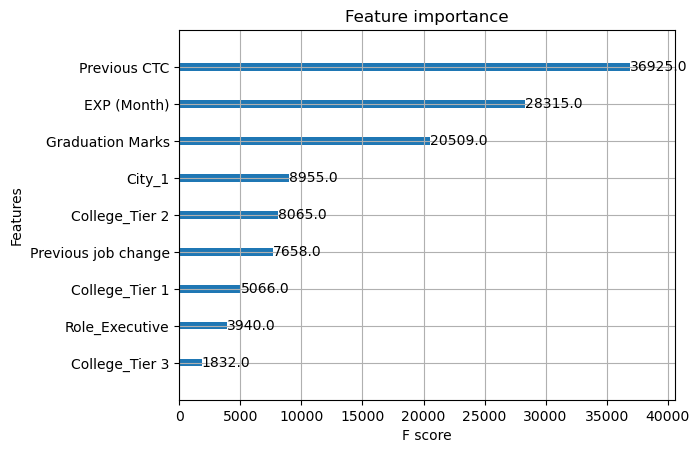

In [130]:
# Import matplot from matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(Xgb_Reg)
plt.show()

### 3.11 Grid Search technique for Xgb Boosting
#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
##### 3.11.1 Performing  Grid Search technique for Xgb Boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [131]:
# Define a dictionary to hold the hyperparameters and their respective ranges/values for testing
param_test = {
    "max_depth": range(3, 11, 2),      # The range of maximum tree depth to consider (3, 11, 2)
    "gamma": [0.1, 0.2, 0.3],          # The list of gamma values to test (used to control regularization)
    "subsample": [0.8, 0.9],           # The list of subsample ratios to test 
    "colsample_bytree": [0.8, 0.9],    # The list of column sample ratios to test
    "reg_alpha": [1e-2, 0.1, 1]}       # The list of L1 regularization terms on weights to test (to control overfitting)

##### Grid search for Xgb boosting is taking little time for execution

In [132]:
# Perform Grid Search with Cross-Validation using the specified parameter grid fro Xgb boosting
Xgb_grid_search = GridSearchCV(Xgb_Reg, param_test, n_jobs=-1, cv=3, scoring="accuracy")

# Fit the Grid Search model to the training data for Xgb boosting
Xgb_grid_search.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.3, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=5000,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 11, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [133]:
# calculate the parameters found in grid search for Xgb boosting
Xgb_best_param = Xgb_grid_search.best_params_

# Print the best parameters
print("Best parameters found for XGb Boosting: ", Xgb_best_param)

Best parameters found for XGb Boosting:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 3, 'reg_alpha': 0.01, 'subsample': 0.8}


In [134]:
# Predict the target variable for the train and test dataset using the grid search for Xgb boosting model
GS_Xgb_y_train_pred = Xgb_grid_search.predict(x_train)
GS_Xgb_y_test_pred = Xgb_grid_search.predict(x_test)

# Print the predicted values for the train and test dataset
print(("\033[1m GS_Xgb_y_train_pred \033[0m"), "\n", GS_Xgb_y_train_pred, "\n")
print(("\033[1m GS_Xgb_y_test_pred \033[0m"), "\n", GS_Xgb_y_test_pred, "\n")

 GS_Xgb_y_train_pred  
 [102968.445  76573.984  77519.32  ...  67522.67   68125.055  71124.12 ] 

 GS_Xgb_y_test_pred  
 [ 61926.5    66836.67   69879.34   69073.89   64284.86   81711.65
  69296.13   78119.97   69207.74   69625.125  61890.434  75870.445
  95866.34   70111.52   71213.945 102788.84   69910.18   68335.41
  74051.4    81049.6   102290.74  120284.6    74126.85   64000.375
  72507.22   74650.1    64321.363 112758.195  75802.375  76435.67
  80356.46   59216.89   83706.83   95879.14  109522.48   83771.99
  59316.594  74437.305  65228.312  72968.55   74763.7    74397.77
  71437.086  63973.676  74034.31   70300.086  87730.48   77671.04
  78154.04   63115.47  119935.734  78931.734 102660.75   75782.53
  93705.92   72269.14   68949.234  63719.69   69662.44   71103.08
  74228.64   79788.6    69573.52   58794.043  62464.773  66946.08
  72692.555  61886.2   100390.62   71732.92   78173.16   67084.38
  70360.55   70380.125  77870.31   85727.31   63650.598  75098.53
  65376.67   60164.

##### 3.11.2 Performance evaluation for grid search technique for Xgb boosting
##### 3.11.2.1 Calculation of MSE for train and test dataset 

In [135]:
# Calculate mean squared error for training dataset of grid search for Xgb boosting
GS_Xgb_train_mse = mean_squared_error(y_train, GS_Xgb_y_train_pred)

# Print "MSE" of train dataset of grid search for Xgb boosting
print(GS_Xgb_train_mse) 

46471.65007339278


In [136]:
# Calculate mean squared error for testing dataset of grid search for Xgb boosting
GS_Xgb_test_mse = mean_squared_error(y_test, GS_Xgb_y_test_pred)

# Print "MSE" of test dataset of grid search for Xgb boosting
print(GS_Xgb_test_mse)

75343479.43018958


##### 3.11.2.2 Calculation of MAE for train and test dataset 

In [137]:
# Calculate mean absolute error for training dataset of grid search for Xgb boosting
GS_Xgb_train_mae = mean_absolute_error(y_train, GS_Xgb_y_train_pred)

# Print "MAE" of train dataset of grid search for Xgb boosting
print(GS_Xgb_train_mae)

156.83400570416993


In [138]:
# Calculate mean absolute error for testing dataset of grid search for Xgb boosting
GS_Xgb_test_mae = mean_absolute_error(y_test, GS_Xgb_y_test_pred)

# Print "MAE" of test dataset of grid search for Xgb boosting
print(GS_Xgb_test_mae)

6301.899495872641


##### 3.11.2.3 Calculation of R-square for train and test dataset 

In [139]:
# R-score calculation for the train dataset's for actual values (y_train) and predicted values (GS_Xgb_y_train_pred)
GS_Xgb_train_R_score = r2_score(y_train, GS_Xgb_y_train_pred)

# Print R-score of train dataset of grid search for Xgb boosting
print(GS_Xgb_train_R_score)

0.9997110491485516


In [140]:
# R-score calculation for the test dataset's for actual values (y_train) and predicted values (GS_Xgb_y_test_pred)
GS_Xgb_test_R_score = r2_score(y_test, GS_Xgb_y_test_pred)

# Print R-score of test dataset of grid search for Xgb boosting
print(GS_Xgb_test_R_score)

0.49224127649120075


##### 3.11.2.4 Checking for overfitting and underfitting 

In [141]:
# Check for overfitting
if GS_Xgb_train_R_score > GS_Xgb_test_R_score + 0.15:  # Example threshold for overfitting
    print("The 'Grid search of Xgb Boosting' trained model is overfitting.")
elif GS_Xgb_train_R_score < GS_Xgb_test_R_score - 0.15:  # Example threshold for underfitting
    print("The 'Grid search of Xgb Boosting' trained model is underfitting.")
else:
    print("The 'Grid search of Xgb Boosting' trained model is Well-fitted.")

The 'Grid search of Xgb Boosting' trained model is overfitting.


### 3.12 Regression Decision Tree
##### 3.12.1 Performing Regression Decision Tree technique by using sklearn model on "y_train" and "x_train" varaibles 

In [142]:
# Import tree from sklearn model
from sklearn import tree

# Train tree for the regression at max_depth=3
regtree = tree.DecisionTreeRegressor(max_depth = 3)

# Fit regression tree with train datasets
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [143]:
# Import Image from IPython.display model
from IPython.display import Image  

# Import pydotplus
import pydotplus  

In [144]:
# export graphviz for tree with some defined parameters
dot_data = tree.export_graphviz(regtree, out_file=None, feature_names=x_train.columns, filled = True)

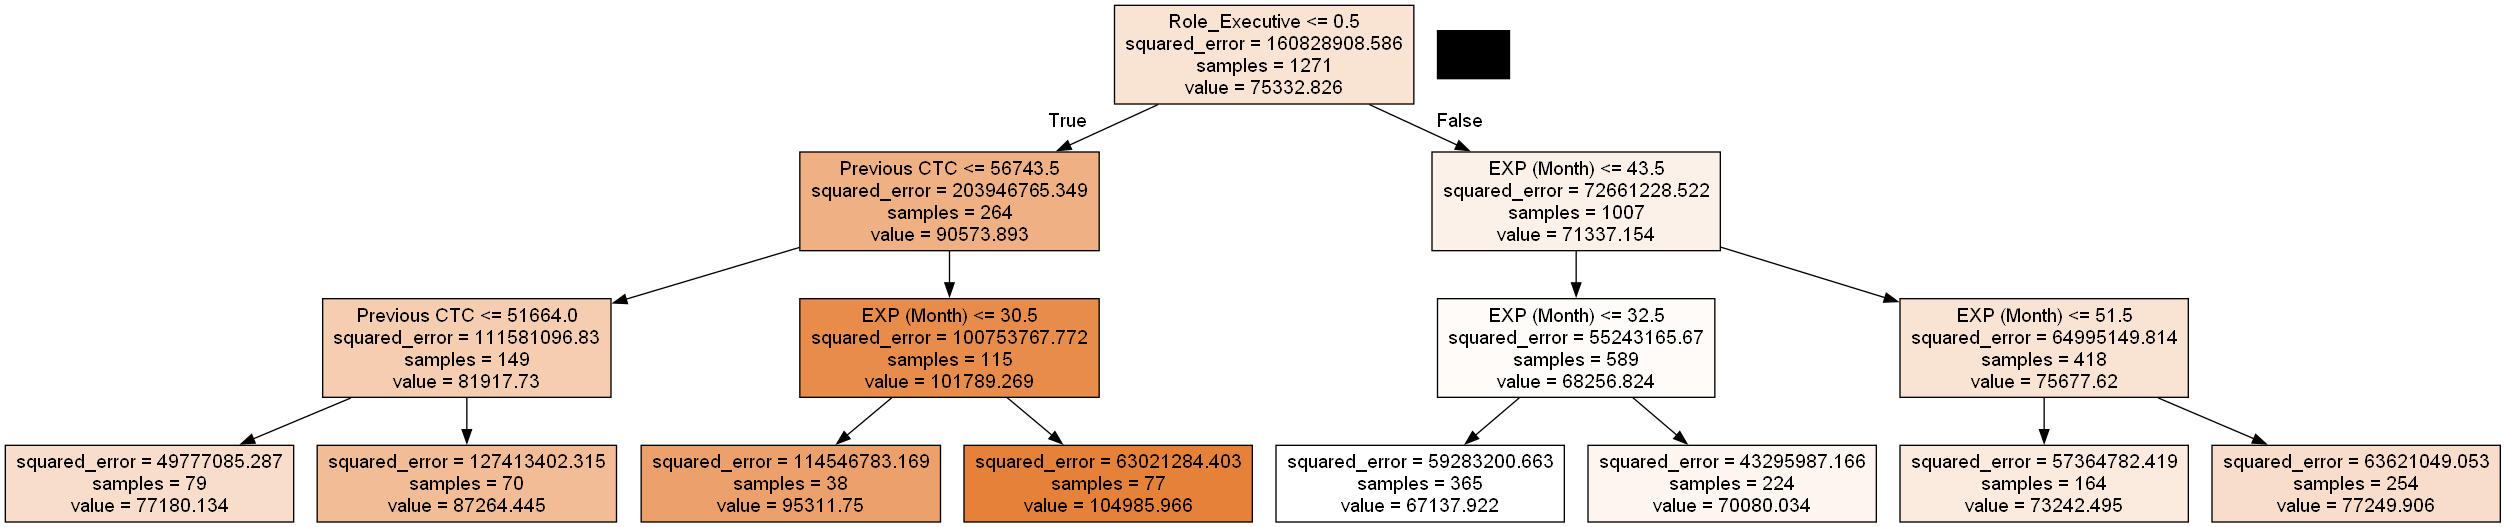

In [145]:
# Generate the graph from the dot data using pydotplus
reg_graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph as a PNG image using IPython's Image class
Image(reg_graph.create_png())

In [146]:
# Predict the target variable for the train and test dataset for regression dicison tree
regtree_y_train_pred = regtree.predict(x_train)
regtree_y_test_pred = regtree.predict(x_test)

# Print the predicted values for the train and test dataset
print(("\033[1m regtree_y_train_pred \033[0m"), "\n", regtree_y_train_pred, "\n")
print(("\033[1m regtree_y_test_pred \033[0m"), "\n", regtree_y_test_pred, "\n")

 regtree_y_train_pred  
 [104985.9661039   70080.03361607  77249.90582677 ...  70080.03361607
  67137.92249315  70080.03361607] 

 regtree_y_test_pred  
 [ 73242.49487805  67137.92249315  67137.92249315  77249.90582677
  73242.49487805  87264.44514286  70080.03361607  73242.49487805
  67137.92249315  73242.49487805  70080.03361607  77249.90582677
  95311.75026316  77249.90582677  73242.49487805 104985.9661039
  67137.92249315  67137.92249315  67137.92249315  77249.90582677
 104985.9661039  104985.9661039   67137.92249315  67137.92249315
  70080.03361607  67137.92249315  77249.90582677 104985.9661039
  77249.90582677  73242.49487805  67137.92249315  67137.92249315
  77180.13443038  77249.90582677 104985.9661039   77249.90582677
  67137.92249315  77180.13443038  67137.92249315  67137.92249315
  67137.92249315  77180.13443038  73242.49487805  67137.92249315
  77249.90582677  70080.03361607  77180.13443038  67137.92249315
  67137.92249315  73242.49487805  95311.75026316  77249.90582677
 10

##### 3.12.2 Performance evaluation for Regression Decision Tree
##### 3.12.2.1 Calculation of MSE for train and test dataset 

In [147]:
# Calculate mean squared error for training dataset of regression dicision tree
regtree_train_mse = mean_squared_error(y_train, regtree_y_train_pred)

# Print "MSE" of train dataset of regression dicision tree
print(regtree_train_mse) 

62125086.31211998


In [148]:
# Calculate mean squared error for testing dataset of regression dicision tree
regtree_test_mse = mean_squared_error(y_test, regtree_y_test_pred)

# Print "MSE" of test dataset of regression dicision tree
print(regtree_test_mse) 

60424631.02613471


##### 3.12.2.2 Calculation of MAE for train and test dataset 

In [149]:
# Calculate mean absolute error for training dataset of regression dicision tree
regtree_train_mae = mean_absolute_error(y_train, regtree_y_train_pred)

# Print "MAE" of train dataset of regression dicision tree
print(regtree_train_mae)

6183.024264239775


In [150]:
# Calculate mean absolute error testing dataset of regression dicision tree
regtree_test_mae = mean_absolute_error(y_test, regtree_y_test_pred)

# Print "MAE" of test dataset of regression dicision tree
print(regtree_test_mae) 

6026.387514876384


##### 3.12.2.3 Calculation of R-square for train and test dataset 

In [151]:
# R-score calculation for the train dataset's for actual values (y_train) and predicted values (regtree_y_train_pred)
regtree_train_R_score = r2_score(y_train, regtree_y_train_pred)

# Print R-score of train dataset of grid search for regression dicision tree
print(regtree_train_R_score)

0.6137194061789908


In [152]:
# R-score calculation for the test dataset's for actual values (y_test) and predicted values (regtree_y_test_pred)
regtree_test_R_score = r2_score(y_test, regtree_y_test_pred)

# Print R-score of test dataset of grid search for regression dicision tree
print(regtree_test_R_score)

0.5927831611924914


##### 3.12.2.4 Checking for overfitting and underfitting 

In [153]:
# Check for overfitting
if regtree_train_R_score > regtree_test_R_score + 0.15:  # Example threshold for overfitting
    print("The 'Regression Decision Tree' trained model is overfitting.")
elif regtree_train_R_score < regtree_test_R_score - 0.15:  # Example threshold for underfitting
    print("The 'Regression Decision Tree' trained model is underfitting.")
else:
    print("The 'Regression Decision Tree' trained model is Well-fitted.")

The 'Regression Decision Tree' trained model is Well-fitted.


### Comparision of machine learning models used to train model for predicting salary

In [154]:
# Function to determine fitting status
def determine_fitting_status(train_r2, test_r2, threshold=0.15):
    if train_r2 > test_r2 + threshold:
        return "Overfitting"
    elif train_r2 < test_r2 - threshold:
        return "Underfitting"
    else:
        return "Well-fitted"

# Data for the table
data = {
    "Model": ["Linear Regression", "Ridge Regression (alpha=0.5)", "Ridge Regression (best fit)", 
              "Lasso Regression (alpha=0.4)", "Lasso Regression (best fit)", "Random Forest",
              "Grid Search of Random Forest", "Gradient Boosting", "AdaBoost", "XGBoost", "Grid Search of XGBoost",
              "Regression Decision Tree"],
    
    "MSE_of_training": [LR_train_mse, Ridge_train_mse, Ridge_best_train_mse, Lasso_train_mse, Lasso_best_train_mse, 
                        RF_train_mse, GS_RF_train_mse, GB_train_mse, Ada_train_mse, Xgb_train_mse, GS_Xgb_train_mse,
                       regtree_train_mse],
    
    "MSE_of_testing": [LR_test_mse, Ridge_test_mse, Ridge_best_test_mse, Lasso_test_mse, Lasso_best_test_mse, 
                       RF_test_mse, GS_RF_test_mse, GB_test_mse, Ada_test_mse, Xgb_test_mse, GS_Xgb_test_mse,
                      regtree_test_mse],
    
    "MAE_of_training": [LR_train_mae, Ridge_train_mae, Ridge_best_train_mae, Lasso_train_mae, Lasso_best_train_mae, 
                        RF_train_mae, GS_RF_train_mae, GB_train_mae, Ada_train_mae, Xgb_train_mae, GS_Xgb_train_mae,
                       regtree_train_mae],
    
    "MAE_of_testing": [LR_test_mae, Ridge_test_mae, Ridge_best_test_mae, Lasso_test_mae, Lasso_best_test_mae, 
                       RF_test_mae, GS_RF_test_mae, GB_test_mae, Ada_test_mae, Xgb_test_mae, GS_Xgb_test_mae,
                      regtree_test_mae],
    
    "R-squared_training": [LR_train_R_score, Ridge_train_R_score, Ridge_best_train_R_score, Lasso_train_R_score, 
                           Lasso_best_train_R_score, RF_train_R_score, GS_RF_train_R_score, GB_train_R_score,
                           Ada_train_R_score, Xgb_train_R_score, GS_Xgb_train_R_score, regtree_train_R_score],
    
    "R-squared_testing": [LR_test_R_score, Ridge_test_R_score, Ridge_best_test_R_score, Lasso_test_R_score, 
                          Lasso_best_test_R_score, RF_test_R_score, GS_RF_test_R_score, GB_test_R_score, 
                          Ada_test_R_score, Xgb_test_R_score, GS_Xgb_test_R_score, regtree_test_R_score]}

# Calculate R-squared differences
data["R-squared_difference"] = [abs(train - test) for train, test in zip(data["R-squared_training"], data["R-squared_testing"])]

# Determine fitting status for each model
fitting_status = [determine_fitting_status(train_r2, test_r2) for train_r2, test_r2 in zip(data["R-squared_training"], 
                                                                                           data["R-squared_testing"])]

# Add fitting status to data
data["Fitting_Status"] = fitting_status

df = pd.DataFrame(data)  # Create DataFrame
print(df) # Display the table

                           Model  MSE_of_training  MSE_of_testing  \
0              Linear Regression     7.502607e+07    6.875132e+07   
1   Ridge Regression (alpha=0.5)     7.502608e+07    6.875206e+07   
2    Ridge Regression (best fit)     7.502760e+07    6.876506e+07   
3   Lasso Regression (alpha=0.4)     7.502607e+07    6.875062e+07   
4    Lasso Regression (best fit)     7.508020e+07    6.864340e+07   
5                  Random Forest     7.998324e+06    5.094562e+07   
6   Grid Search of Random Forest     8.200496e+06    5.430427e+07   
7              Gradient Boosting     4.462873e+07    5.663162e+07   
8                       AdaBoost     6.011469e+07    5.932090e+07   
9                        XGBoost     1.370528e-03    6.310996e+07   
10        Grid Search of XGBoost     4.647165e+04    7.534348e+07   
11      Regression Decision Tree     6.212509e+07    6.042463e+07   

    MAE_of_training  MAE_of_testing  R-squared_training  R-squared_testing  \
0       6864.301792     

## 4. Which model’s performance is best and what could be the possible reason for that?

In [155]:
# Find the row with the minimum R-squared difference
min_r2_diff_index = df["R-squared_difference"].idxmin()
min_r2_diff_row = df.loc[min_r2_diff_index]

# Display the entire row with minimum R-squared difference
print(min_r2_diff_row)

Model                   Ridge Regression (best fit)
MSE_of_training                     75027601.725003
MSE_of_testing                      68765057.541224
MAE_of_training                         6865.686236
MAE_of_testing                          6586.831524
R-squared_training                         0.533494
R-squared_testing                          0.536575
R-squared_difference                       0.003081
Fitting_Status                          Well-fitted
Name: 2, dtype: object


After evaluating twelve possible regression models, the **Ridge Regression (best fit)** showed the best performance as its R-squared_difference value is less in compare to other eleven possible regression model.

- Ridge Regression (best fit) is an shrinkage learning method based on other than the OLS (Ordinary least square) based model, which tends to perform well in continous data type target variable.

- Ridge Regression (best fit) methos looks for the parameters according to the case study dataset, at which it provide best fit and gives less R-square difference between train and test dataframe.

- Ridge Regression (best fit) performed better than other models due to its ability to capture complex relationships in the data, handle outliers, and provide robust predictions.

- It handles non-linear relationships between features and the target variable effectively, and it's less prone to overfitting.

## 5. What steps can you take to improve this selected model’s performance even further?
**5.1 Hyperparameter Tuning:-** Perform grid search or randomized search to fine-tune hyperparameters like the number of estimators, maximum depth, minimum samples split, etc., of the Random Forest Regressor.

&rightarrow; Performed grid-search above for Random Forest Regressor **(refer to 3.7)**

**5.2 Ensemble Methods:-** Explore ensemble methods like Gradient Boosting Regressor models to further improve performance.

&rightarrow; Performed ensemble methods above like Gradient Boosting Regressor **(refer to 3.8)**

**5.3 Decision Tree:-** Analyse the prediction with the decision tree as it more closely mirrors human decision-making than other regression **(refer to 3.12)**

**5.4 Advanced Techniques:-** Analyse with advanced techniques like ADABoost, and XGBoost to see if they can achieve better performance.

&rightarrow; Performed advanced techniques like ADABoost **(refer to 3.9)**, and XGBoost **(refer to 3.10)**

**Data Augmentation:-** If applicable and required, augment the dataset with additional data or synthetically generated data to increase the model's training data and improve its performance.


In [156]:
# End time
end_time = time.time()

# Calculate and print execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")  # ptint execution time in second

Execution time: 426.4732737541199 seconds
